<a href="https://colab.research.google.com/github/Samub96/GoogleColab/blob/develop/Analitica_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://www.icesi.edu.co/buscar-personas/assets/img/ban-icesi.png width="250" height="100" align="center">


-------------------



# **<big><big>THIRD HANDABLE (Predictive models)  </big></big><br><small>DATA ANALITICS</small>**


#**<small> <br>SAMUEL BARONA</small><br><small>_*A00394081*_  </small>**


------

#Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400

# **<big><big>FIRST HANDABLE  </big></big><br>**


## 1 Loading and baselines pre-cleaning data


In [ ]:

import scipy.stats as stats
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import math
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
import statsmodels.api as sm
from sklearn import tree, datasets, metrics, neighbors
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import graphviz
from collections import Counter


from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.decomposition import PCA

We load the data in the memory an visualize the initial data and summarized.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/analitica/proyectofinal.data.csv',sep=";",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The attributes do not come with titles, so we are going to specify them directly.

In [ ]:
colnames = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", " curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
         "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
data.columns=colnames
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


 We are going to fix the categorical variable. First we establish the 2 possible values.
 Then, we modify by replacing the 4 values ​​that will be considered positive.

<Axes: xlabel='symboling', ylabel='count'>

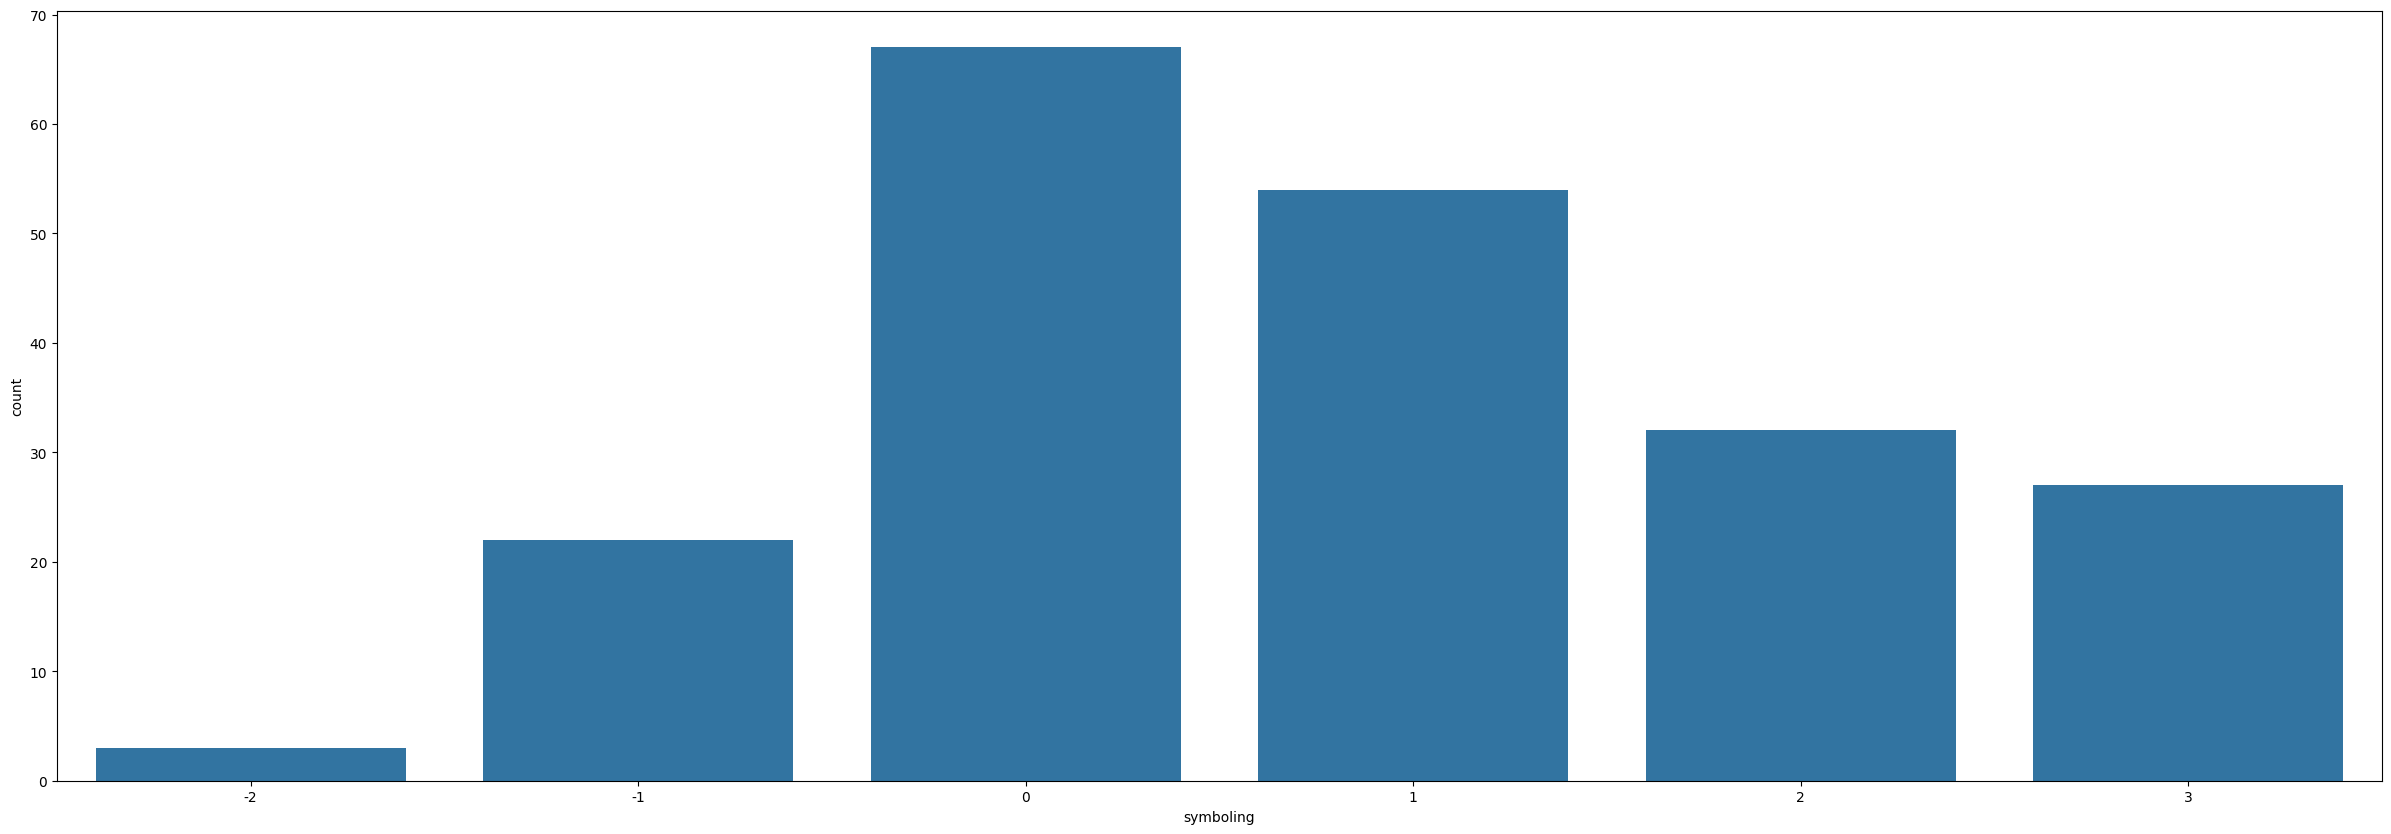

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="symboling", data=data)

In [ ]:
pd.crosstab(index=data["symboling"], columns="count")

col_0,count
symboling,
-2,3
-1,22
0,67
1,54
2,32
3,27


In [ ]:
data.loc[(data.symboling <= 0 ), "symboling"] = 0
data.loc[(data.symboling > 0 ), "symboling"] = 1

##BASELINES

###Baseline global

<Axes: xlabel='symboling', ylabel='count'>

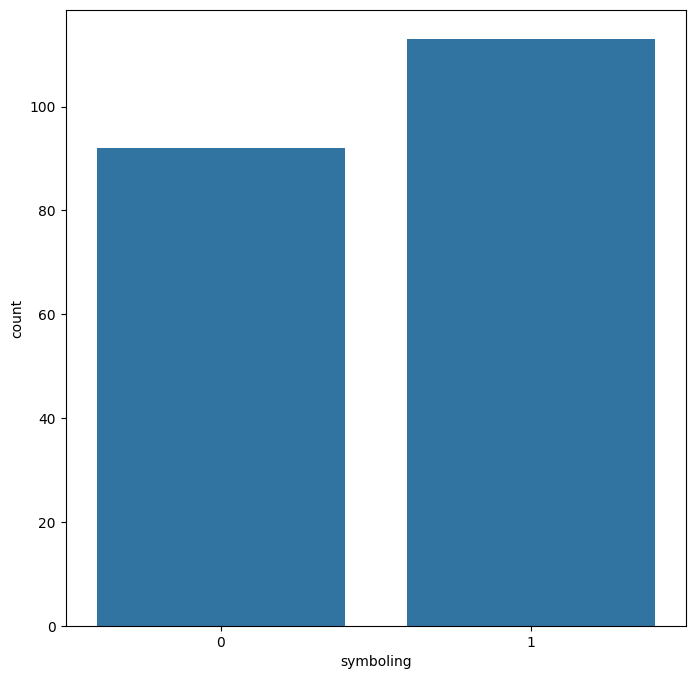

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=data)

First we gather the data from the atribute symboling in two variables. $0=$Represents the data that goes between $0$ and $-3$, this variable represents that the car is more probably safe. And the other variable is $1=$ This variable represents the values between $1$ to $3$, and it represents that the car is more unsafe.

In [ ]:
data.target = data.symboling.astype(str)

<ipython-input-9-a29307437550>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data.symboling.astype(str)


In [ ]:
pd.crosstab(index=data["symboling"], columns="count")

col_0,count
symboling,
0,92
1,113


In [ ]:
data['symboling'][data['symboling'] == '0'].count()/data.shape[0]*100

0.0

We can see and analyse that the grafics shows that the global baseline are unbalance,Because there are more cars that are unsafe than the cars that really are safe. By saying the value of the variables are 45.59585492227979 or $≈46 $%

###Baseline by make

<Axes: xlabel='make', ylabel='count'>

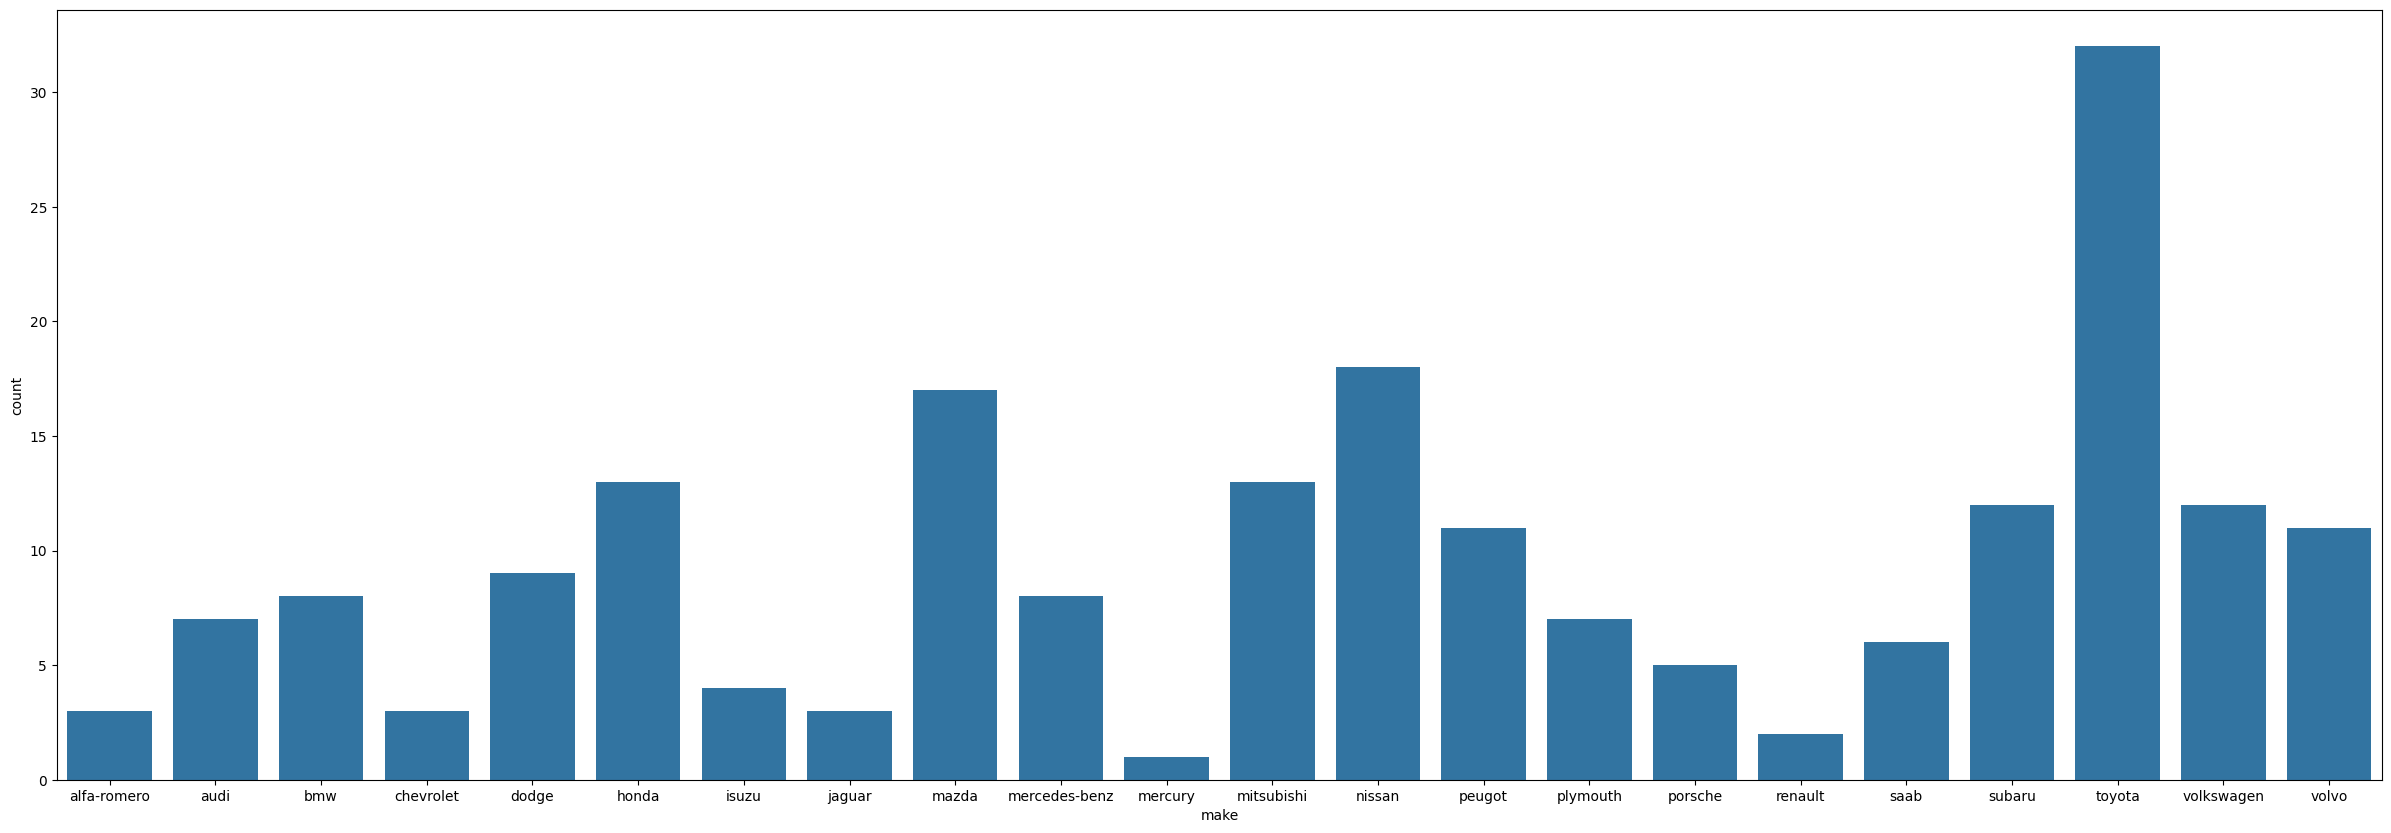

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="make", data=data)

In [ ]:
pd.crosstab(index=data['make'],columns='count')

col_0,count
make,
alfa-romero,3
audi,7
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,4
jaguar,3
mazda,17


Most of the data from database are Toyota

In [ ]:
dataalfa_romero=data[data.make=="alfa-romero"]
dataaudi=data[data.make=="audi"]
databmw=data[data.make=="bmw"]
datachevrolet=data[data.make=="chevrolet"]
datadodge=data[data.make=="dodge"]
datahonda=data[data.make=="honda"]
dataisuzu=data[data.make=="isuzu"]
datajaguar=data[data.make=="jaguar"]
datamercedes_benz	=data[data.make=="mercedes-benz	"]
datamercury=data[data.make=="mercury"]
datamitsubishi=data[data.make=="mitsubishi"]
datanissan=data[data.make=="nissan"]
datapeugot=data[data.make=="peugot"]
dataplymouth=data[data.make=="plymouth"]
dataporsche=data[data.make=="porsche"]
datasaab=data[data.make=="saab"]
datasubaru=data[data.make=="subaru"]
datatoyota=data[data.make=="toyota"]
datavolkswagen=data[data.make=="volkswagen"]
datavolvo=data[data.make=="volvo"]


###Baseline alfa-romero

<Axes: xlabel='symboling', ylabel='count'>

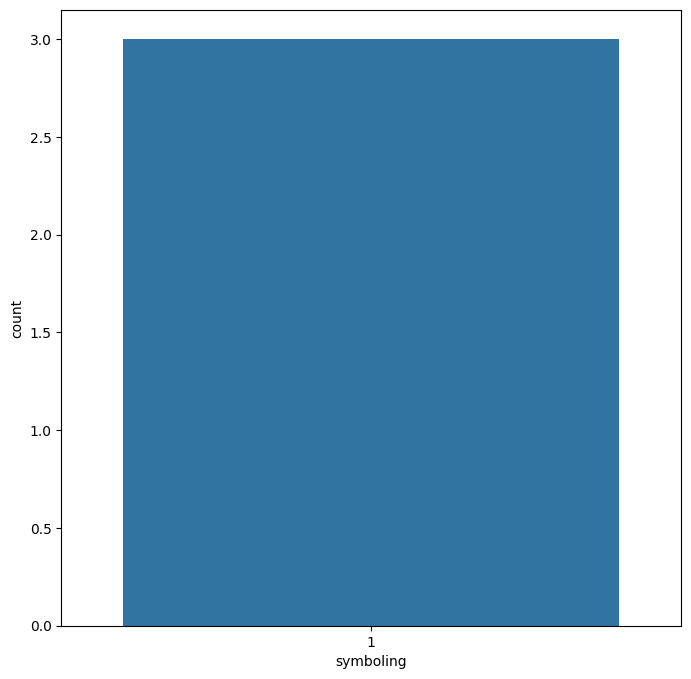

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=dataalfa_romero)

In [ ]:
dataalfa_romero['symboling'][dataalfa_romero['symboling'] == 0].count()/dataalfa_romero.shape[0]*100

0.0

As we can see $0$% of alfa_romero cars are safe

###Baseline  audi

<Axes: xlabel='symboling', ylabel='count'>

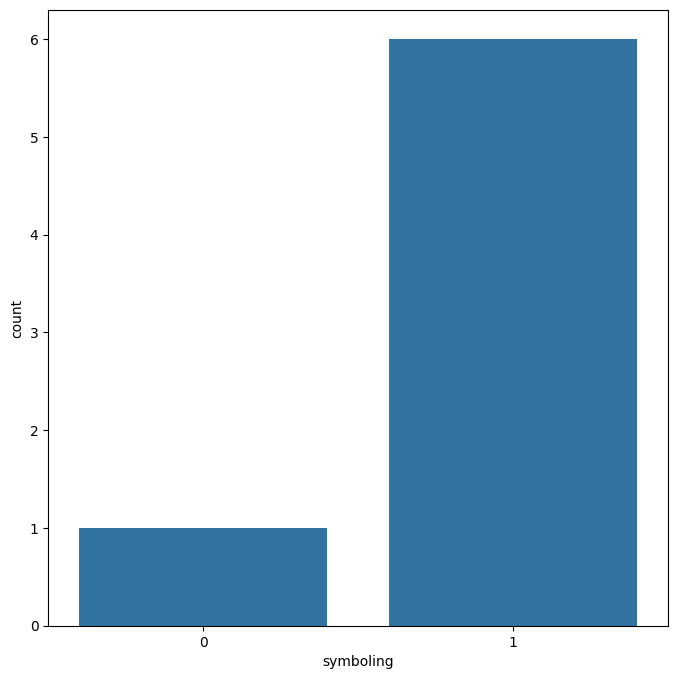

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=dataaudi)

In [ ]:
dataaudi['symboling'][dataaudi['symboling'] == 1].count()/dataaudi.shape[0]*100

85.71428571428571

As we can see $85.71$% of audi cars are unsafe

###Baseline  BMW

<Axes: xlabel='symboling', ylabel='count'>

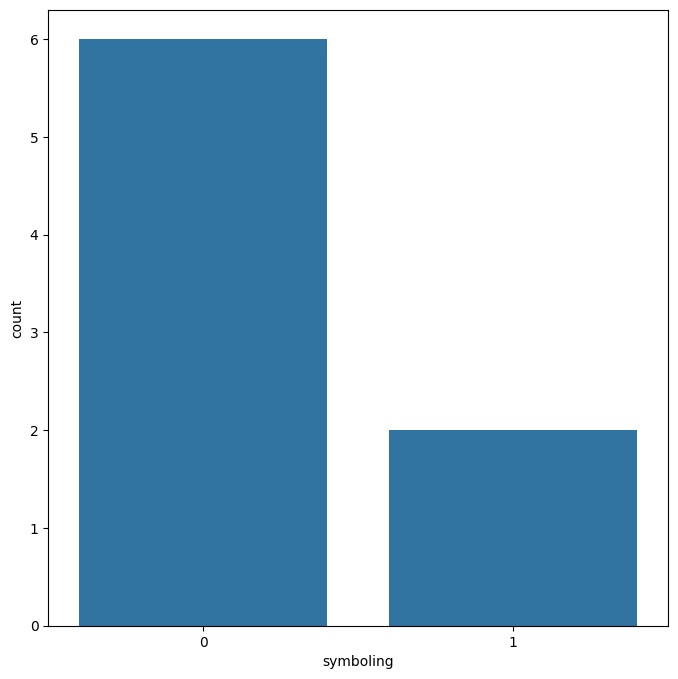

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=databmw)

In [ ]:
databmw['symboling'][databmw['symboling'] == 0].count()/databmw.shape[0]*100

75.0

As we can see $75$% of bmw cars are safe

###Baseline  chevrolet

<Axes: xlabel='symboling', ylabel='count'>

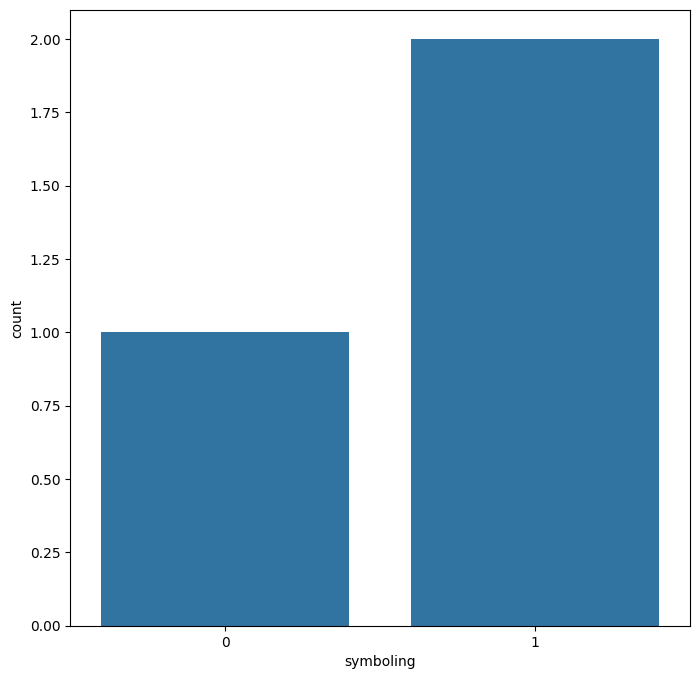

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datachevrolet)

In [ ]:
datachevrolet['symboling'][datachevrolet['symboling'] == 1].count()/datachevrolet.shape[0]*100

66.66666666666666

As we can see $66.6$% of chevrolet cars are unsafe

###Baseline  dodge

<Axes: xlabel='symboling', ylabel='count'>

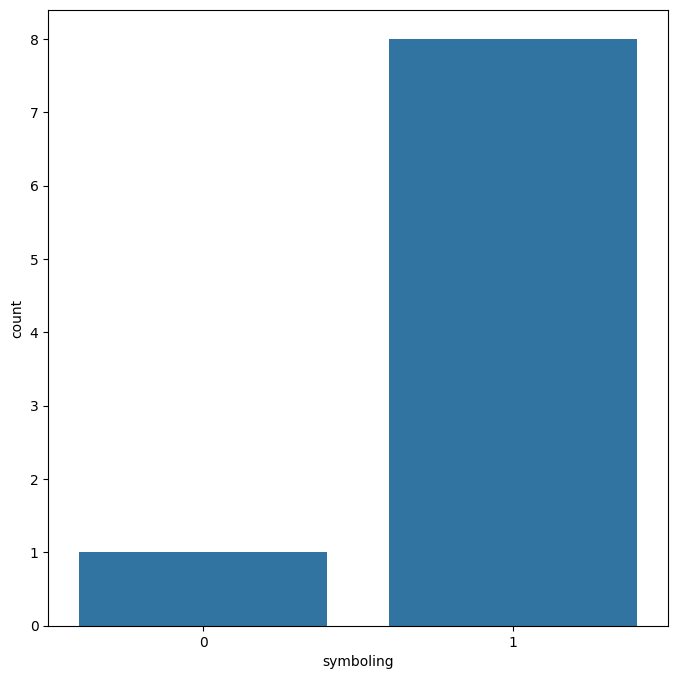

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datadodge)

In [ ]:
datadodge['symboling'][datadodge['symboling'] == 1].count()/datadodge.shape[0]*100

88.88888888888889

As we can see $88.88$% of dodge cars are unsafe

###Baseline Honda

<Axes: xlabel='symboling', ylabel='count'>

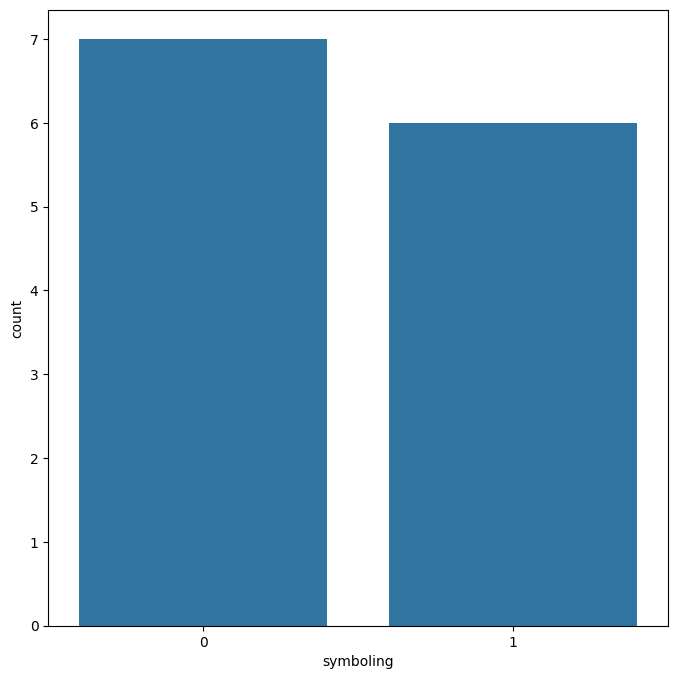

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datahonda)

In [ ]:
datahonda['symboling'][datahonda['symboling'] == 0].count()/datahonda.shape[0]*100

53.84615384615385

As we can see $53.8$% of Honda cars are safe

###Baseline isuzu

<Axes: xlabel='symboling', ylabel='count'>

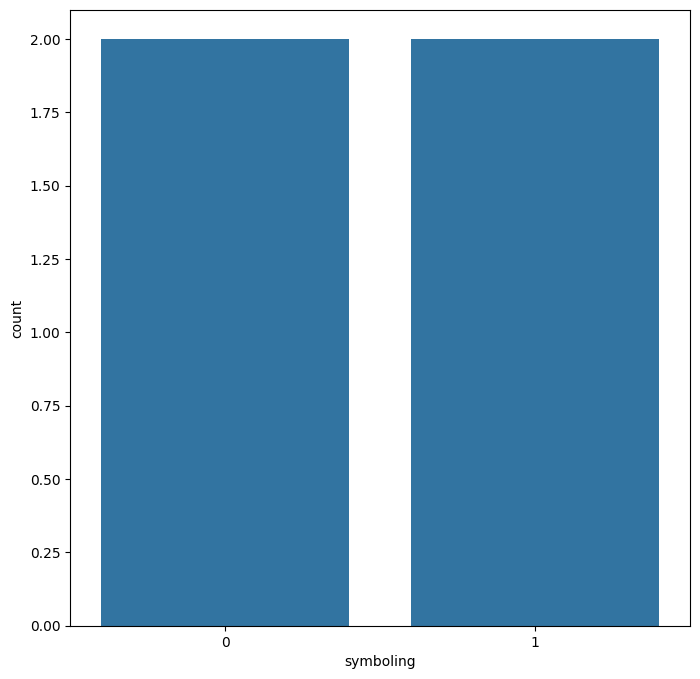

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=dataisuzu)

In [ ]:
dataisuzu['symboling'][dataisuzu['symboling'] == 0].count()/dataisuzu.shape[0]*100

50.0

As we can see $50$% of isuzu cars are safe

###Baseline jaguar

<Axes: xlabel='symboling', ylabel='count'>

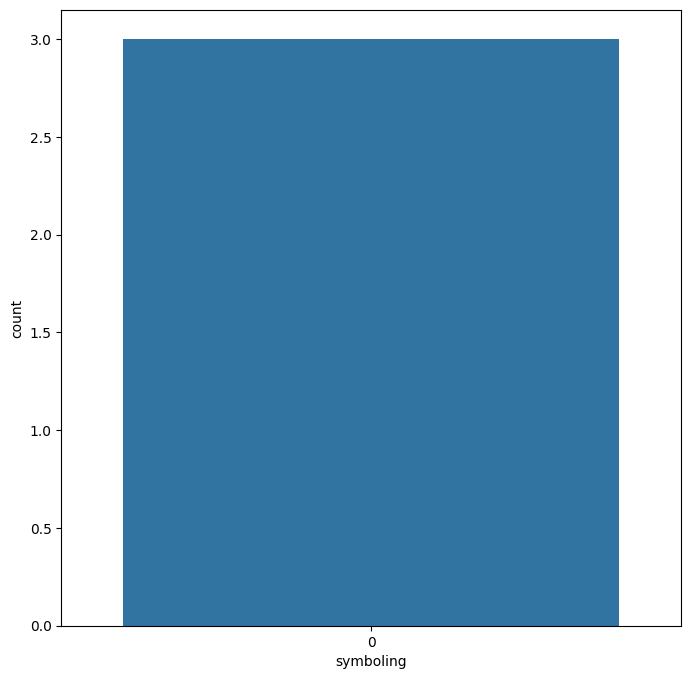

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datajaguar)

In [ ]:
datajaguar['symboling'][datajaguar['symboling'] == 0].count()/datajaguar.shape[0]*100

100.0

As we can see $100$% of jaguar cars are safe

###Baseline mercedez-bens

<Axes: >

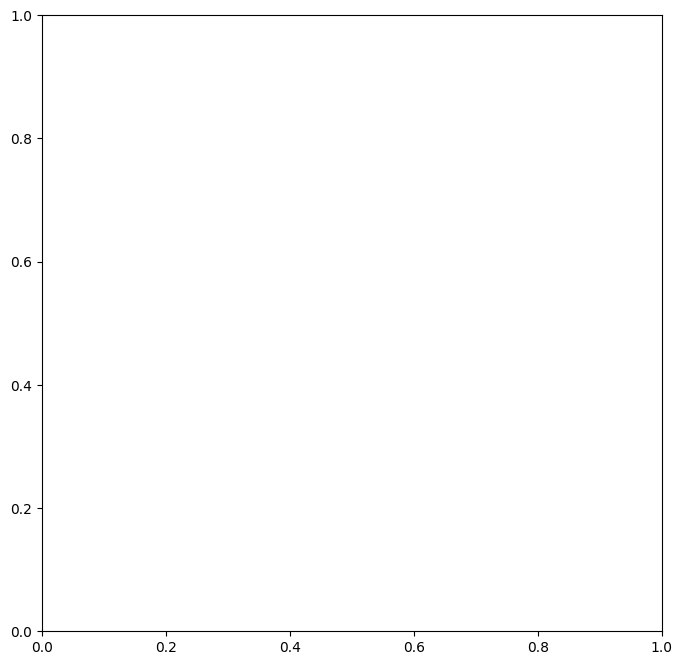

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datamercedes_benz)

In [ ]:
datamercedes_benz['symboling'][datamercedes_benz['symboling'] == 0].count()/datamercedes_benz.shape[0]*100

<ipython-input-32-508900605f8d>:1: RuntimeWarning: invalid value encountered in scalar divide
  datamercedes_benz['symboling'][datamercedes_benz['symboling'] == 0].count()/datamercedes_benz.shape[0]*100


nan

As we can see all of mercedez benz cars have Nan values

###Baseline mercury

<Axes: xlabel='symboling', ylabel='count'>

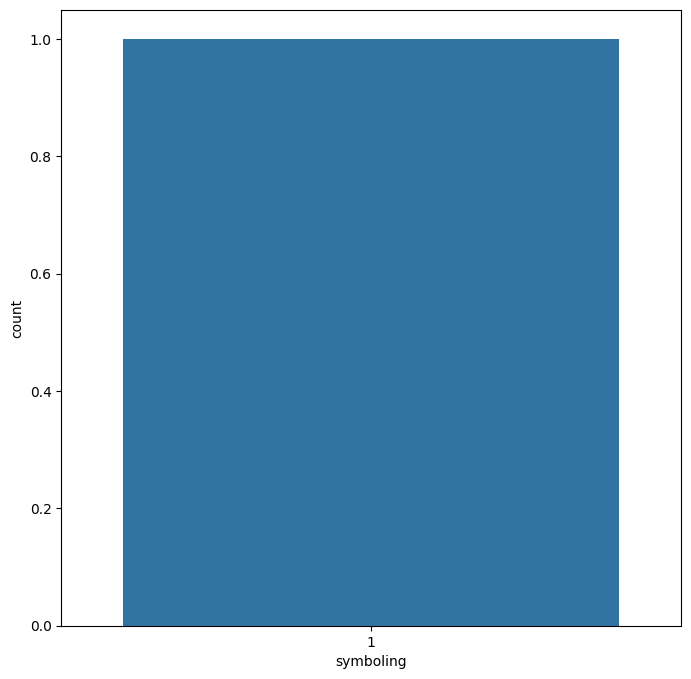

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datamercury)

In [ ]:
datamercury['symboling'][datamercury['symboling'] == 1].count()/datamercury.shape[0]*100

100.0

As we can see $100$% of mercury cars are unsafe

###Baseline mitsubishi

<Axes: xlabel='symboling', ylabel='count'>

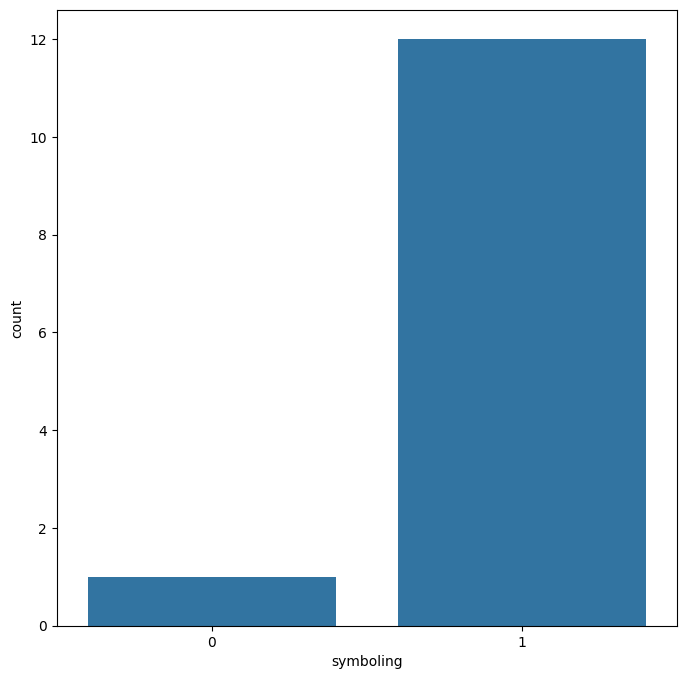

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datamitsubishi)

In [ ]:
datamitsubishi['symboling'][datamitsubishi['symboling'] == 1].count()/datamitsubishi.shape[0]*100

92.3076923076923

As we can see $92$% of Mitsubisgi cars are unsafe

###Baseline nissan

<Axes: xlabel='symboling', ylabel='count'>

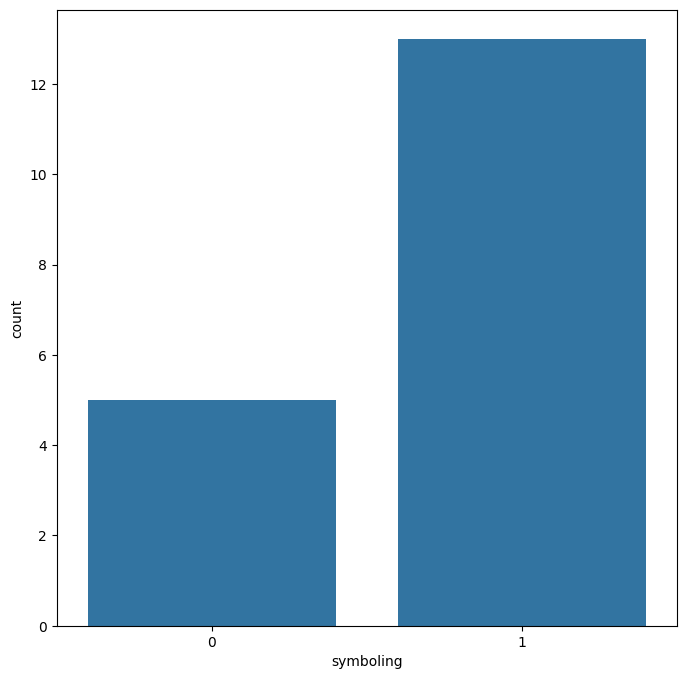

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datanissan)

In [ ]:
datanissan['symboling'][datanissan['symboling'] == 1].count()/datanissan.shape[0]*100

72.22222222222221

As we can see $72$% of nissan cars are unsafe

###Baseline plymouth

<Axes: xlabel='symboling', ylabel='count'>

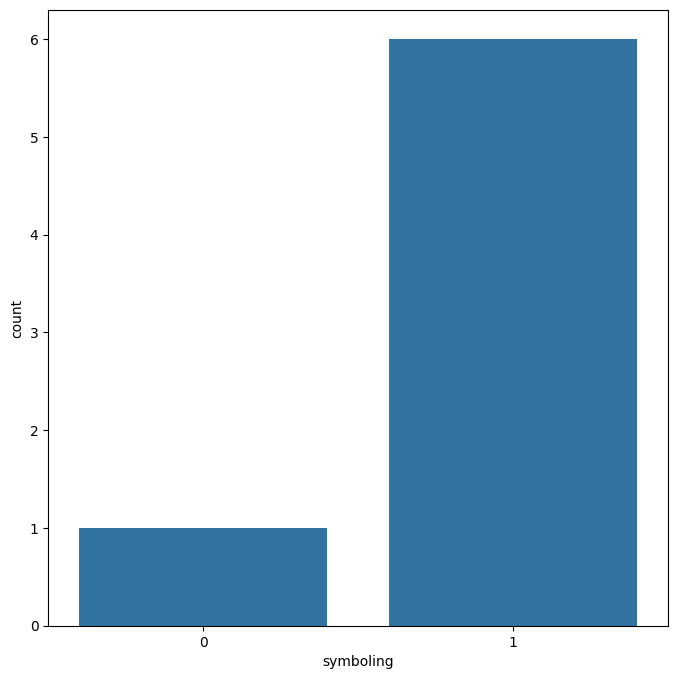

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=dataplymouth)

In [ ]:
dataplymouth['symboling'][dataplymouth['symboling'] == 1].count()/dataplymouth.shape[0]*100

85.71428571428571

As we can see $85.7$% of Plymouth cars are unsafe

###Baseline peugot

<Axes: xlabel='symboling', ylabel='count'>

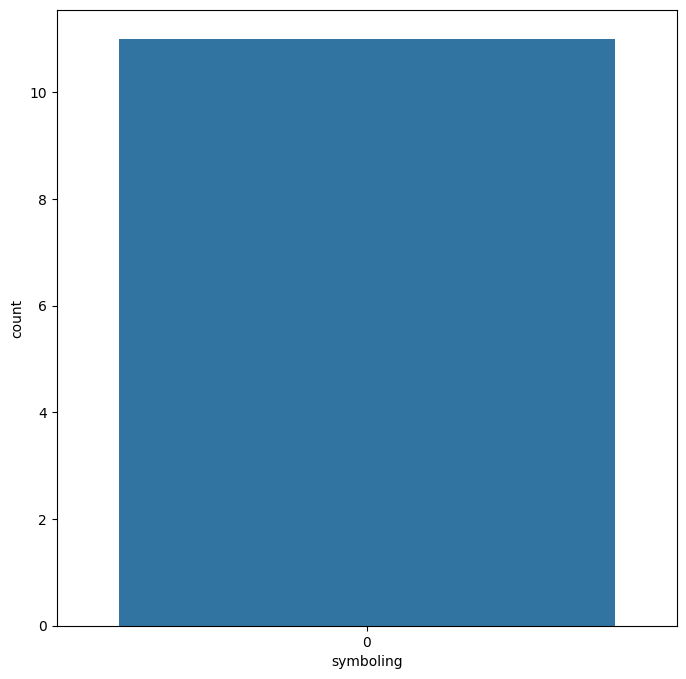

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datapeugot)

In [ ]:
datapeugot['symboling'][datapeugot['symboling'] == 1].count()/datapeugot.shape[0]*100

0.0

As we can see $100$% of Peugot cars are safe

###Baseline porsche

<Axes: xlabel='symboling', ylabel='count'>

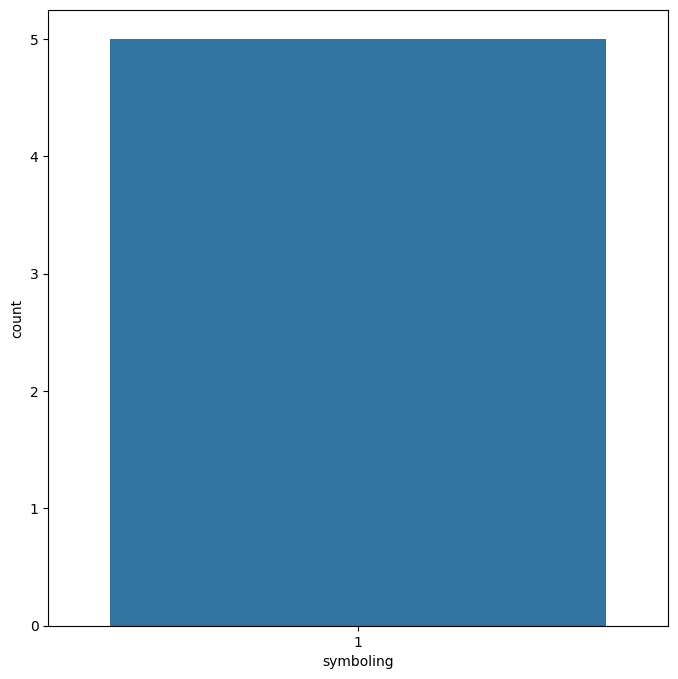

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=dataporsche)

In [ ]:
dataporsche['symboling'][dataporsche['symboling'] == 1].count()/dataporsche.shape[0]*100

100.0

As we can see $100$% of Porsche cars are unsafe

###Baseline saab

<Axes: xlabel='symboling', ylabel='count'>

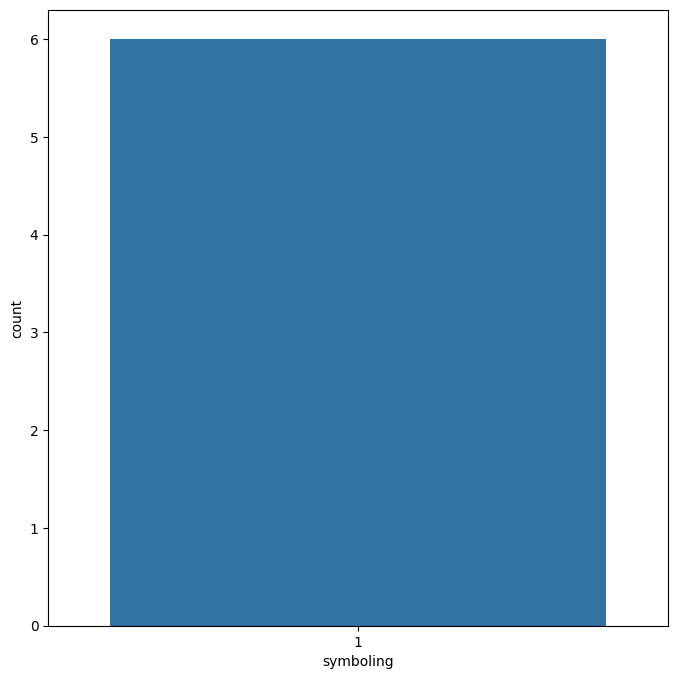

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datasaab)

In [ ]:
datasaab['symboling'][datasaab['symboling'] == 1].count()/datasaab.shape[0]*100

100.0

As we can see $100$% of Saab cars are unsafe

###Baseline subaru

<Axes: xlabel='symboling', ylabel='count'>

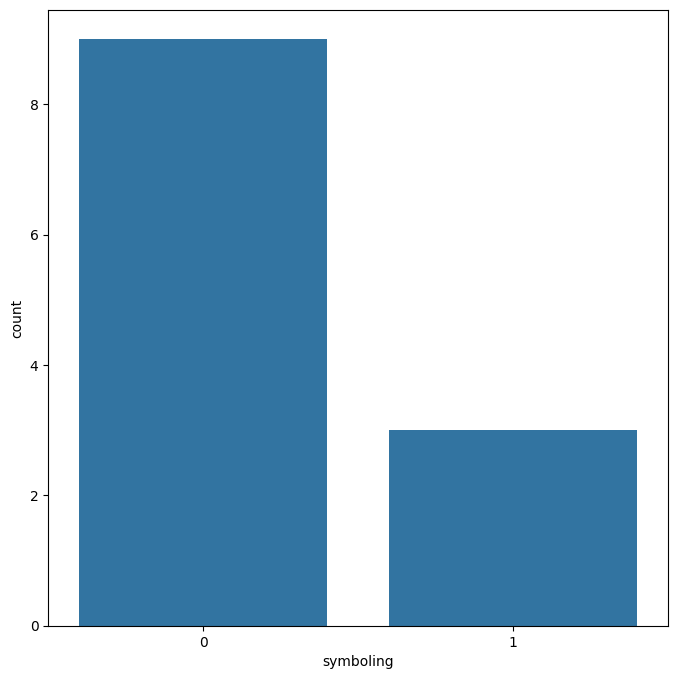

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datasubaru)

In [ ]:
datasubaru['symboling'][datasubaru['symboling'] == 1].count()/datasubaru.shape[0]*100

25.0

As we can see $25$% of Subaru cars are unsafe

###Baseline toyota

<Axes: xlabel='symboling', ylabel='count'>

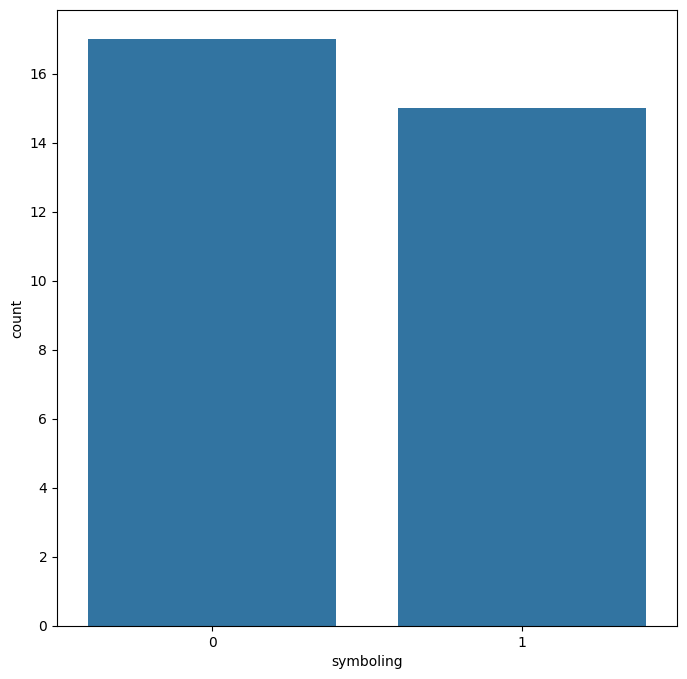

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datatoyota)

In [ ]:
datatoyota['symboling'][datatoyota['symboling'] == 1].count()/datatoyota.shape[0]*100

46.875

As we can see $46.8$% of Toyota cars are unsafe

###Baseline volkswagen

<Axes: xlabel='symboling', ylabel='count'>

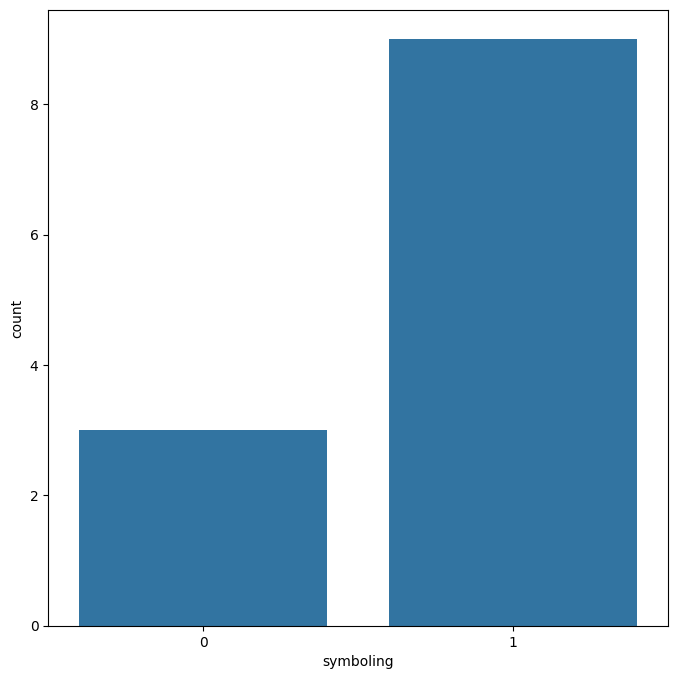

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datavolkswagen)

In [ ]:
datavolkswagen['symboling'][datavolkswagen['symboling'] == 1].count()/datavolkswagen.shape[0]*100

75.0

As we can see $75$ % of Volkswagen cars are unsafe

###Baseline volvo

<Axes: xlabel='symboling', ylabel='count'>

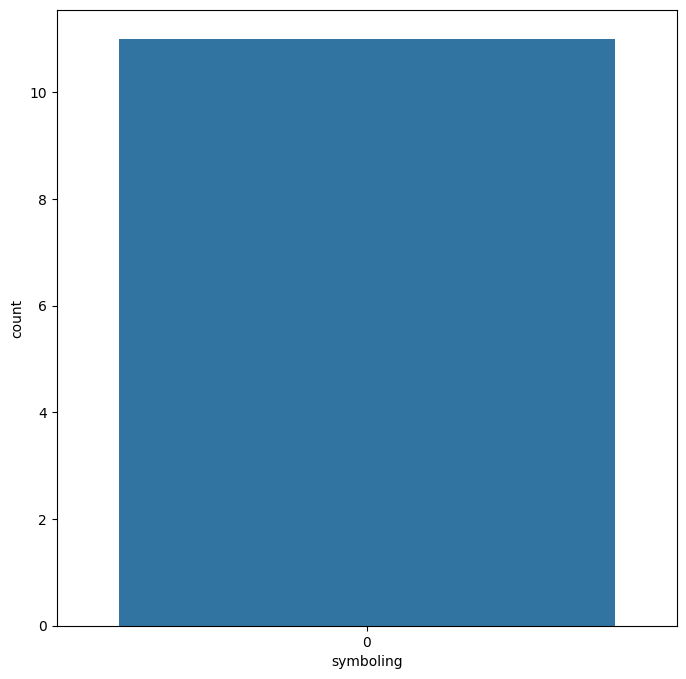

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='symboling',data=datavolvo)

In [ ]:
datavolvo['symboling'][datavolvo['symboling'] == 1].count()/datavolvo.shape[0]*100

0.0

As we can see $100$% of Volvo cars are safe

## **2. Analysis of data quality problems**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13   curb-weight       205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Here we can say about the data:

- Has data values that doesn't belong to categoric or numerics format
- has many lost-values

so, now is necessary to do a EDA


In [ ]:
data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.551220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,0.498587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Here we can see that:
- we confirm the types of variables that do not correspond to many of the columns.
- we find in the normalized-losses and price variables categorical data where the most common value is "?", this problem could appear in other categorical variables where "?" It is not the most predominant value.


In [ ]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
 curb-weight           int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
cols = ['symboling', 'make', 'fuel-type', 'aspiration', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
        'fuel-system']
for col in cols:
    data[col] = data[col].astype(str)

We cannot convert some fields into numeric ones since the character "?" is present, which cannot be converted to a number.
We assume that this character indicates a missing value, so we convert all corresponding values ​​to nan.

In [ ]:
for var in data.select_dtypes(include=['object']).columns:
    cantidad = data[data[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en symboling con el valor ?
Existen 41 valores en normalized-losses con el valor ?
Existen 0 valores en make con el valor ?
Existen 0 valores en fuel-type con el valor ?
Existen 0 valores en aspiration con el valor ?
Existen 2 valores en num-of-doors con el valor ?
Existen 0 valores en body-style con el valor ?
Existen 0 valores en drive-wheels con el valor ?
Existen 0 valores en engine-location con el valor ?
Existen 0 valores en engine-type con el valor ?
Existen 0 valores en num-of-cylinders con el valor ?
Existen 0 valores en fuel-system con el valor ?
Existen 4 valores en bore con el valor ?
Existen 4 valores en stroke con el valor ?
Existen 2 valores en horsepower con el valor ?
Existen 2 valores en peak-rpm con el valor ?
Existen 4 valores en price con el valor ?


In [ ]:
data = data.replace('?',np.nan)


Having made these changes we can now convert the incorrect categorical variables into numerical ones.

In [ ]:
columns = ['normalized-losses','wheel-base', 'length', 'width', 'height', ' curb-weight', 'bore', 'stroke', 'compression-ratio', 'compression-ratio',
           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
for col in columns:
    data[col] = data[col].astype('float64')


We review the new data types for all variables in the dataset

In [ ]:
data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203,203.000000,205.000000,205.000000,201.000000
unique,2,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN
top,1,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN
freq,113,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN
mean,NaN,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,NaN,5125.369458,25.219512,30.751220,13207.129353
std,NaN,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,NaN,479.334560,6.542142,6.886443,7947.066342
min,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,NaN,4150.000000,13.000000,16.000000,5118.000000
25%,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,NaN,4800.000000,19.000000,25.000000,7775.000000
50%,NaN,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,NaN,5200.000000,24.000000,30.000000,10295.000000
75%,NaN,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,NaN,5500.000000,30.000000,34.000000,16500.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13   curb-weight       205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Cleaning: missing values**

Several of the dataset attributes have missing values
- "num-of-doors" has 2 worthless records
- "bore" has 4 worthless registers
- "stroke" has 4 worthless registers
- "horsepower" has 2 worthless records
- "peak-rpm" has 2 worthless registers
- "price" has 4 worthless records
- "normalized-losses" has 41 worthless records


In [ ]:
data[data['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,10945.0
56,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,11845.0
57,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,13645.0
58,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000.0,16.0,23.0,15645.0


Let's try to find patterns in the missing values.

We first analyze the records with few missing values.

We start with the normalized-losses

In [ ]:
data[data['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500.0,24.0,30.0,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650.0,36.0,42.0,10795.0


We view 2 registers of num-of-doors with NAs (27, 63).  1 is from normalized-losses ,so we procedure to eliminate them.

In [ ]:
data = data[~data['num-of-doors'].isna()]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    object 
 1   normalized-losses  163 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13   curb-weight       203 non-null    float64
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non-null

We continue with the missing values of bore, stroke, horsepower, peak-rpm and price

In [ ]:
data[data['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500.0,16.0,22.0,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400.0,38.0,43.0,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400.0,38.0,43.0,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750.0,17.0,28.0,NaN


In [ ]:
data[data['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9295.0
131,1,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9895.0


In [ ]:
data[data['horsepower'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9295.0
131,1,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9895.0


In [ ]:
data[data['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,10945.0
56,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,11845.0
57,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,13645.0
58,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000.0,16.0,23.0,15645.0


In [ ]:
data[data['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,10945.0
56,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,11845.0
57,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17.0,23.0,13645.0
58,1,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000.0,16.0,23.0,15645.0


the registers are different, the mayority of them are with symboling 1, so we procedure to eliminate them.

In [ ]:
data = data[~data['stroke'].isna()]

In [ ]:
data = data[~data['bore'].isna()]

In [ ]:
data = data[~data['price'].isna()]

In [ ]:
data = data[~data['horsepower'].isna()]

In [ ]:
data = data[~data['peak-rpm'].isna()]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    object 
 1   normalized-losses  159 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13   curb-weight       193 non-null    float64
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non-null

 The variable normalized-losses has too many missing values, so we are going to eliminate it

In [ ]:
data.drop(columns=['normalized-losses'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    object 
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12   curb-weight       193 non-null    float64
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non-null

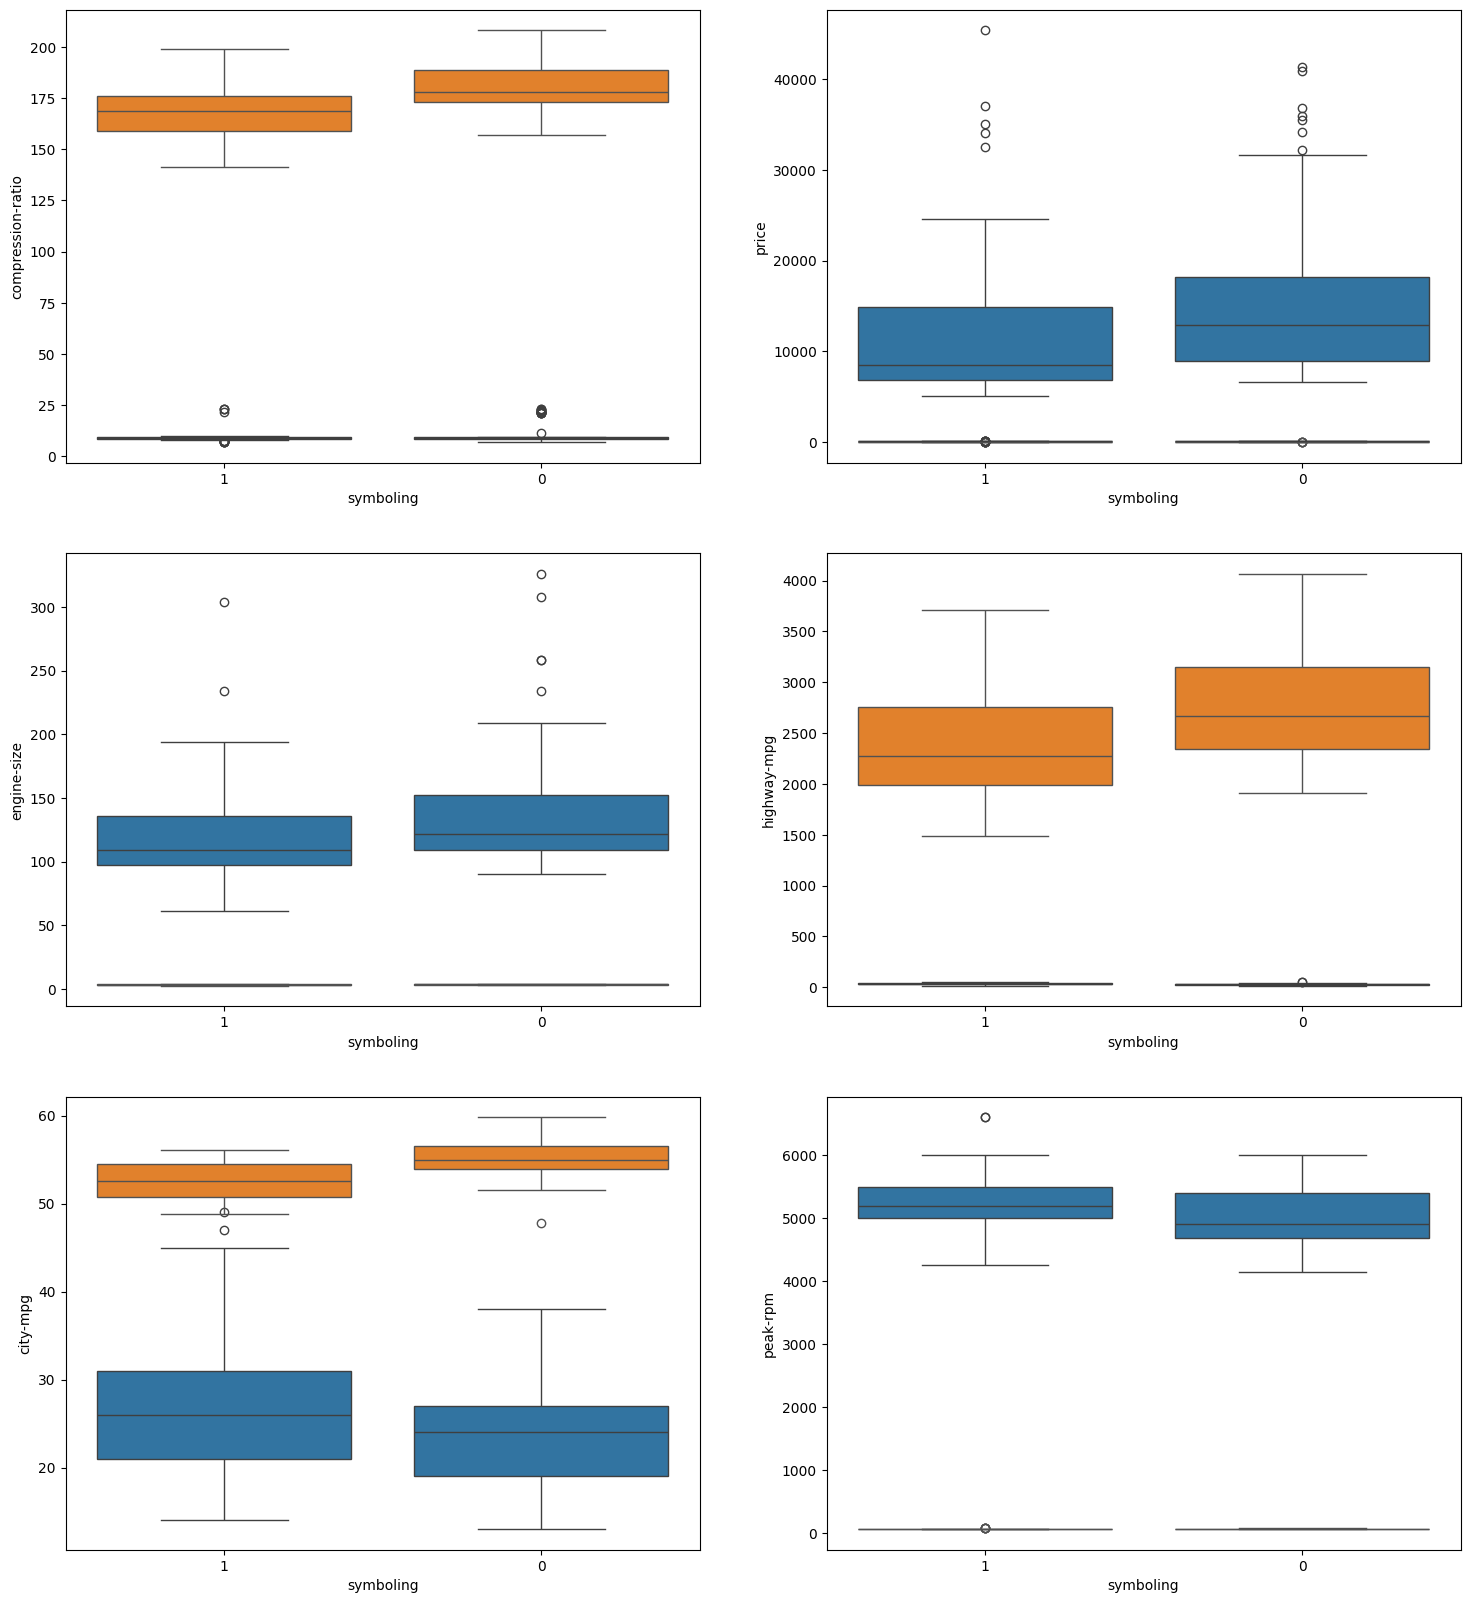

In [ ]:
cols = ['price','engine-size','highway-mpg','city-mpg','peak-rpm',
        'compression-ratio','stroke','bore',' curb-weight','height',
        'width','length','wheel-base'
        ]
i=1
plt.figure(figsize=(18,20))
for col in cols:
    plt.subplot(3, 2, i % 6 + 1)
    sns.boxplot(x='symboling',y=col,data=data)
    i += 1

<ipython-input-82-6b342e81b059>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['symboling']=='0'][col],shade=True,color='blue')
<ipython-input-82-6b342e81b059>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['symboling']=='1'][col],shade=True,color='orange')
<ipython-input-82-6b342e81b059>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['symboling']=='0'][col],shade=True,color='blue')
<ipython-input-82-6b342e81b059>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d

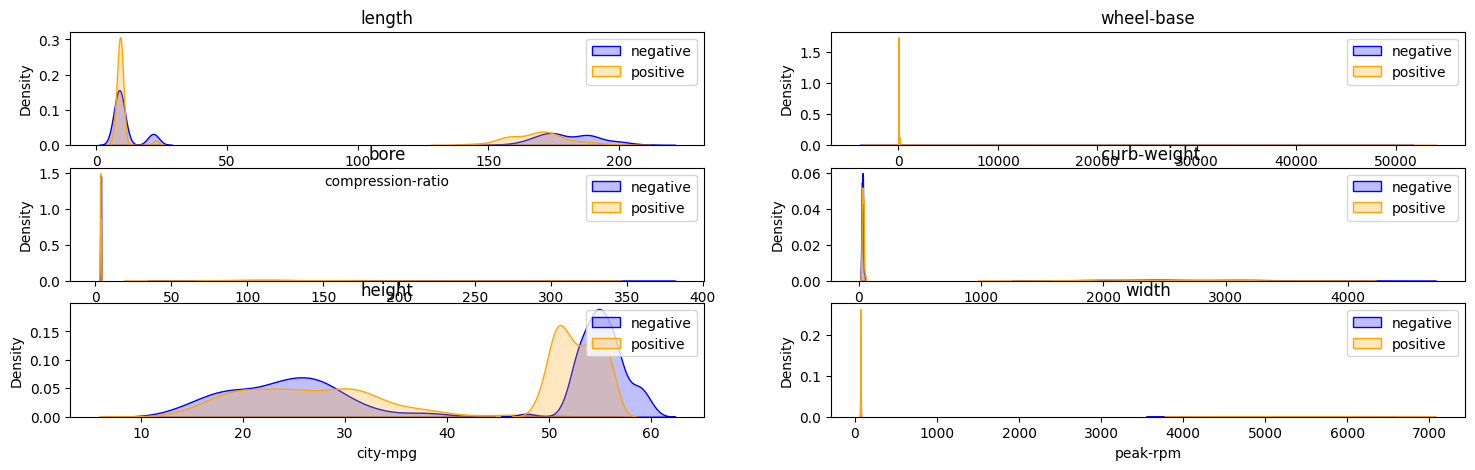

In [ ]:
cols = ['price','engine-size','highway-mpg','city-mpg','peak-rpm',
        'compression-ratio','stroke','bore',' curb-weight','height',
        'width','length','wheel-base']
i=1
plt.figure(figsize=(18,5))
for col in cols:
    plt.subplot(3, 2, i % 6 + 1)
    sns.kdeplot(data[data['symboling']=='0'][col],shade=True,color='blue')
    sns.kdeplot(data[data['symboling']=='1'][col],shade=True,color='orange')
    plt.legend(['negative','positive'])
    plt.title(col)
    i += 1

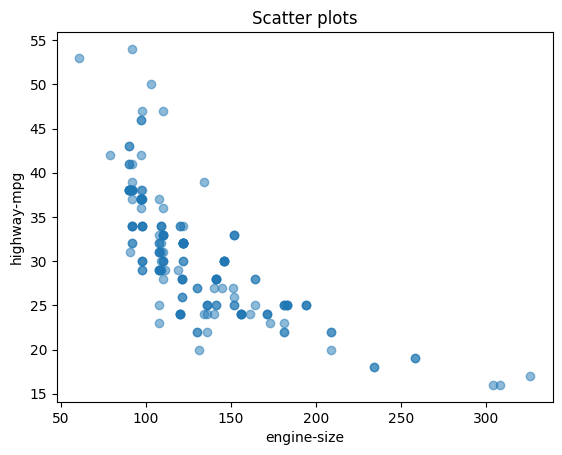

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract data organize in columns x y y
x = data['engine-size']
y = data['highway-mpg']

# Create the scatter plots
plt.scatter(x, y, alpha=0.5)  # alpha controls the opacity from the points in the plot
plt.xlabel('engine-size')
plt.ylabel('highway-mpg')
plt.title('Scatter plots')

# Show the plot
plt.show()

In these chart we can see how engine-size and highway-mpg has a Strength relationship with a strong correlation  beacuse the data don't look dispersed

# **Conclusions**


In conclusion, when determining car insurance, two key variables play a significant role: Symboling and Make.

Symboling, reflecting the safety of a car, serves as a crucial factor in assessing insurance risk. Cars with higher symbol ratings are generally considered safer and may consequently attract lower insurance premiums due to their reduced likelihood of being involved in accidents or sustaining significant damages.

On the other hand, the Make of the car, representing its brand, also influences insurance rates. Different car manufacturers have varying reputations for safety, reliability, and cost of repairs. Insurance companies often take these factors into account when setting premiums. For instance, luxury brands might have higher repair costs, leading to higher insurance rates, while mainstream or economy brands could offer more affordable premiums.

In essence, both Symboling and Make contribute to insurers' assessments of risk, with safer cars and reputable brands often leading to more favorable insurance rates. However, individual circumstances and additional factors may also influence the final premium determination.

# **<big><big>SECOND HANDABLE  </big></big><br>**

The last handable we made the cleanig and EDA with those database, in summary, we  collected the following important information.


Escribir el resumen aqui

##1. Undestanding data and cleaning

After to clean and made EDA, we still usin the modicated database

In [ ]:
#@markdown Looking the information of each column
print(data.keys())



Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', ' curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


In [ ]:
#@markdown
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    object 
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12   curb-weight       193 non-null    float64
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non-null

In [ ]:
data.describe(include="all")

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193,193,193,193,193,193,193,193,193.000000,193.000000,...,193.000000,193,193.000000,193.000000,193.000000,193,193.000000,193.000000,193.000000,193.000000
unique,2,21,2,2,2,5,3,2,NaN,NaN,...,NaN,7,NaN,NaN,NaN,56,NaN,NaN,NaN,NaN
top,1,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN
freq,105,32,174,158,112,92,114,190,NaN,NaN,...,NaN,88,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.923834,174.326425,...,128.124352,NaN,3.330622,3.248860,10.143627,NaN,5099.740933,25.326425,30.787565,13285.025907
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.152409,12.478593,...,41.590452,NaN,0.272385,0.315421,3.977491,NaN,468.694369,6.387828,6.816910,8089.082886
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,61.000000,NaN,2.540000,2.070000,7.000000,NaN,4150.000000,13.000000,16.000000,5118.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,98.000000,NaN,3.150000,3.110000,8.500000,NaN,4800.000000,19.000000,25.000000,7738.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,120.000000,NaN,3.310000,3.290000,9.000000,NaN,5100.000000,25.000000,30.000000,10245.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,184.600000,...,146.000000,NaN,3.590000,3.410000,9.400000,NaN,5500.000000,30.000000,34.000000,16515.000000


##2. Protocolo de entrenamiento y evaluación de modelos

In [ ]:
le =  LabelEncoder()
datos2=data.copy()
for col in data.columns:
    if data[col].dtype == 'object':
        datos2[col] = le.fit_transform(data[col])


In [ ]:
X = datos2.drop(['symboling'], axis=1)
y = datos2['symboling']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

##3. Entrenamiento de los 3 modelos

# **Arboles de decision**

We are going to apply a decision tree classification model to a dataset, that describes the different specifications of the characteristics of different car brands to calculate the insurance risk rating of a car as well as characterizing the different segments of the population.

In [ ]:
X = datos2.drop(['symboling'], axis=1)
y = datos2['symboling']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
clf = DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=4, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para
    max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4)

In [ ]:
X.columns[np.argsort(-clf.feature_importances_)]

Index(['num-of-doors', 'bore', 'horsepower', 'height', 'wheel-base',
       'compression-ratio', 'make', 'num-of-cylinders', 'price', 'stroke',
       'width', 'engine-location', 'highway-mpg', 'engine-type',
       'drive-wheels', 'engine-size', 'fuel-system', 'body-style',
       'aspiration', 'fuel-type', 'peak-rpm', 'city-mpg', 'length',
       ' curb-weight'],
      dtype='object')

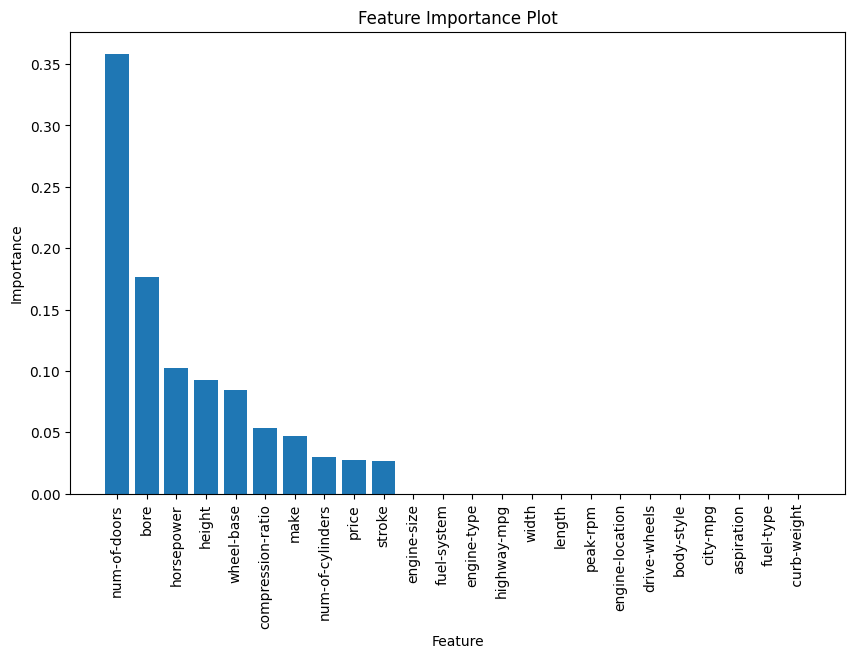

In [ ]:
importance = clf.feature_importances_

feature_names = X.columns  # Assuming X is a pandas DataFrame

# Sort feature importances in descending order
sorted_indices = importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.show()

In [ ]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

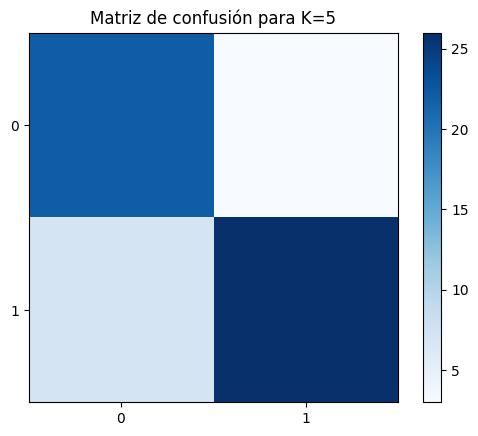

[[22  3]
 [ 7 26]]


In [ ]:
cm_train= metrics.confusion_matrix(y_train,y_train_predict)
cm_test= metrics.confusion_matrix(y_test, y_test_predict)


plt.imshow(cm_test, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())
plt.show()

print(cm_test)

In [ ]:
print("Train Exactitud    : ", metrics.accuracy_score(y_train, y_train_predict))
print("Train Kappa         : ", metrics.cohen_kappa_score(y_train, y_train_predict))
print("Train Precisión     : ", metrics.precision_score(y_train, y_train_predict, average='macro'))
print("Train Recall        : ", metrics.recall_score(y_train, y_train_predict, average='macro'))
VN = np.sum(cm_train[1:3,1:3])
FP = np.sum(cm_train[0,1:3])
specificity = VN/(VN+FP)
print("Train Especificidad : ", specificity)
print("Train F1-score      : ", metrics.f1_score(y_train, y_train_predict, average='macro'))

Train Exactitud    :  0.9851851851851852
Train Kappa         :  0.9702970297029703
Train Precisión     :  0.9846153846153847
Train Recall        :  0.9861111111111112
Train Especificidad :  1.0
Train F1-score      :  0.9851452464788731


In [ ]:
print("Test Exactitud     : ", metrics.accuracy_score(y_test, y_test_predict))
print("Test Kappa         : ", metrics.cohen_kappa_score(y_test, y_test_predict))
print("Test Precisión     : ", metrics.precision_score(y_test, y_test_predict, average='macro'))
print("Test Recall        : ", metrics.recall_score(y_test, y_test_predict, average='macro'))
VN = np.sum(cm_test[1:3,1:3])
FP = np.sum(cm_test[0,1:3])
specificity = VN/(VN+FP)
print("Test Especificidad : ", specificity)
print("Test F1-score      : ", metrics.f1_score(y_test, y_test_predict, average='macro'))

Test Exactitud     :  0.8275862068965517
Test Kappa         :  0.6551724137931034
Test Precisión     :  0.8275862068965517
Test Recall        :  0.833939393939394
Test Especificidad :  0.896551724137931
Test F1-score      :  0.8267622461170848


In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=5)
print(cv_scores)

[0.64102564 0.79487179 0.82051282 0.60526316 0.68421053]


In [ ]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f (+/- %0.2f)" % (key, score.mean(), score.std() * 2))

fit_time: 0.03 (+/- 0.02)
score_time: 0.04 (+/- 0.02)
test_accuracy: 0.70 (+/- 0.18)
test_precision_weighted: 0.71 (+/- 0.20)
test_recall_weighted: 0.70 (+/- 0.18)
test_f1_weighted: 0.70 (+/- 0.19)


In [ ]:

X = datos2.drop('symboling', axis=1)  # features
y = datos2['symboling']  # label

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos (escalar características numéricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un objeto de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


NameError: name 'StandardScaler' is not defined

# **Logistic regression model**

We are going to analyze the numerical and categorical variables in our database

In [ ]:
datos_num = datos2.select_dtypes(include=['float64','int64'])
datos_num.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,0,1,0,1,0,2,0,88.6,168.8,...,130,4,3.47,2.68,9.0,5,5000.0,21.0,27.0,13495.0
1,1,0,1,0,1,0,2,0,88.6,168.8,...,130,4,3.47,2.68,9.0,5,5000.0,21.0,27.0,16500.0
2,1,0,1,0,1,2,2,0,94.5,171.2,...,152,4,2.68,3.47,9.0,19,5000.0,19.0,26.0,16500.0
3,1,1,1,0,0,3,1,0,99.8,176.6,...,109,4,3.19,3.40,10.0,2,5500.0,24.0,30.0,13950.0
4,1,1,1,0,0,3,0,0,99.4,176.6,...,136,4,3.19,3.40,8.0,8,5500.0,18.0,22.0,17450.0


In [ ]:
datos_cat = datos2.select_dtypes(include=['object'])
datos_cat.head()

""
0
1
2
3
4


So, in order for us to continue we need to convert the categorical variables in numeric variables. We did this before so we are just going to import it.

In [ ]:
datos2.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,0,1,0,1,0,2,0,88.6,168.8,...,130,4,3.47,2.68,9.0,5,5000.0,21.0,27.0,13495.0
1,1,0,1,0,1,0,2,0,88.6,168.8,...,130,4,3.47,2.68,9.0,5,5000.0,21.0,27.0,16500.0
2,1,0,1,0,1,2,2,0,94.5,171.2,...,152,4,2.68,3.47,9.0,19,5000.0,19.0,26.0,16500.0
3,1,1,1,0,0,3,1,0,99.8,176.6,...,109,4,3.19,3.40,10.0,2,5500.0,24.0,30.0,13950.0
4,1,1,1,0,0,3,0,0,99.4,176.6,...,136,4,3.19,3.40,8.0,8,5500.0,18.0,22.0,17450.0


Given the grafics from de correalation analisis data. We can infer that the variables with a mayor number of correlation regards the variable symboling are 'wheel base', 'length', 'width', 'height', 'normalized losses'. From this info we can infer that we can predict the result from symboling given the variables we mention before.  

In [ ]:
datos_lr = data[['symboling', 'width', 'length', 'height','wheel-base']]
datos_lr.head()

,symboling,width,length,height,wheel-base
0,1,64.1,168.8,48.8,88.6
1,1,64.1,168.8,48.8,88.6
2,1,65.5,171.2,52.4,94.5
3,1,66.2,176.6,54.3,99.8
4,1,66.4,176.6,54.3,99.4


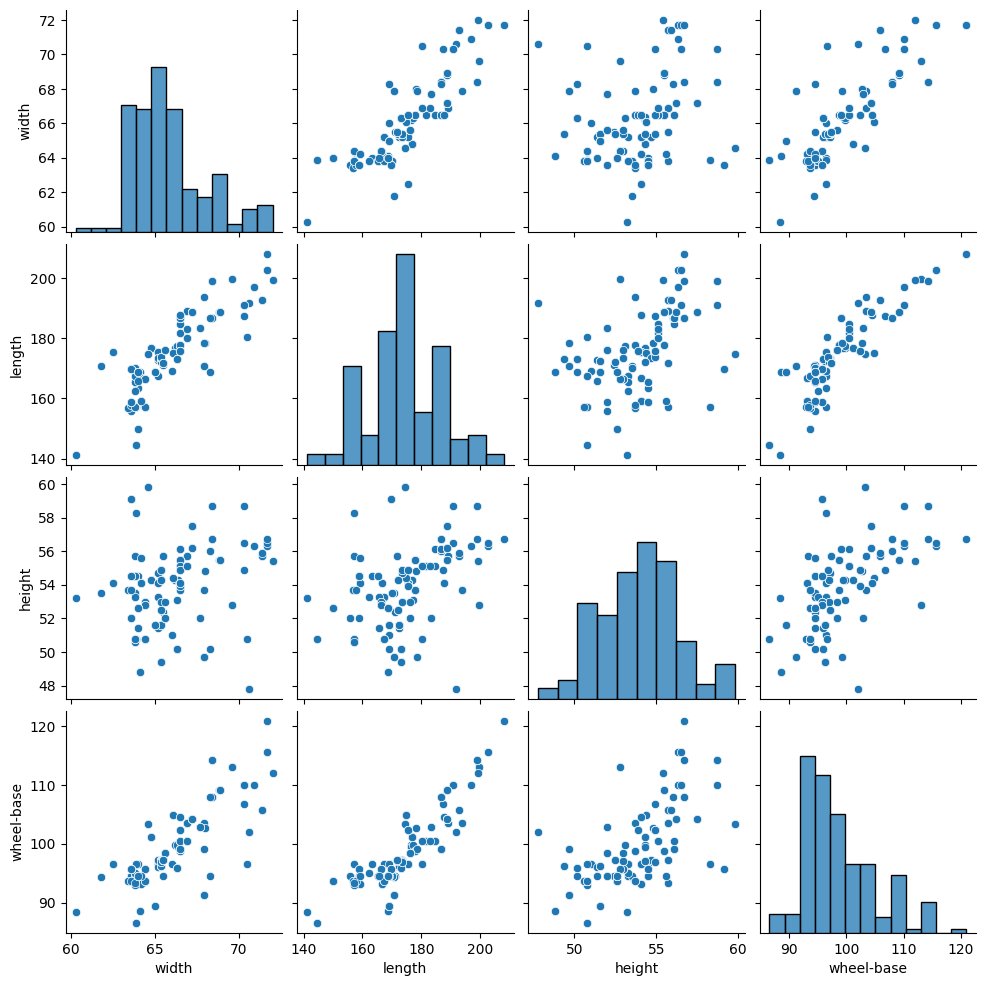

In [ ]:
sns.pairplot(datos_lr)
plt.show()

In [ ]:
datos_lr.shape

(193, 5)

Before we build the model, we need to escalate all the numerical variables that were previously

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(datos_lr, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
datos_lr.columns

Index(['symboling', 'width', 'length', 'height', 'wheel-base'], dtype='object')

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Define the features to be scaled
scale_features = ['symboling', 'wheel-base', 'width', 'length', 'height']

# Scale the features in the training set
df_train[scale_features] = scaler.fit_transform(df_train[scale_features])

In [ ]:
df_train.head()

,symboling,width,length,height,wheel-base
174,-1.007435,0.232702,0.050257,0.376700,0.524814
187,0.992620,-0.236175,-0.267396,0.716579,-0.320413
99,-1.007435,-0.376838,-0.128932,0.291730,-0.336986
86,0.992620,-0.283063,-0.210381,-1.025302,-0.486144
73,-1.007435,2.670860,2.697366,1.141428,3.590835


In [ ]:
df_train.describe()

,symboling,width,length,height,wheel-base
count,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02
mean,1.644775e-16,5.914610e-15,1.634906e-15,-8.223874e-16,-7.237009e-17
std,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00
min,-1.007435e+00,-2.674333e+00,-2.759750e+00,-2.639729e+00,-1.795418e+00
25%,-1.007435e+00,-8.457145e-01,-6.176285e-01,-7.703930e-01,-5.855823e-01
50%,9.926198e-01,-2.361749e-01,-1.207866e-01,1.217901e-01,-3.369861e-01
75%,9.926198e-01,4.202524e-01,9.462018e-01,7.165788e-01,5.248144e-01
max,9.926198e-01,2.670860e+00,2.697366e+00,2.161066e+00,3.590835e+00


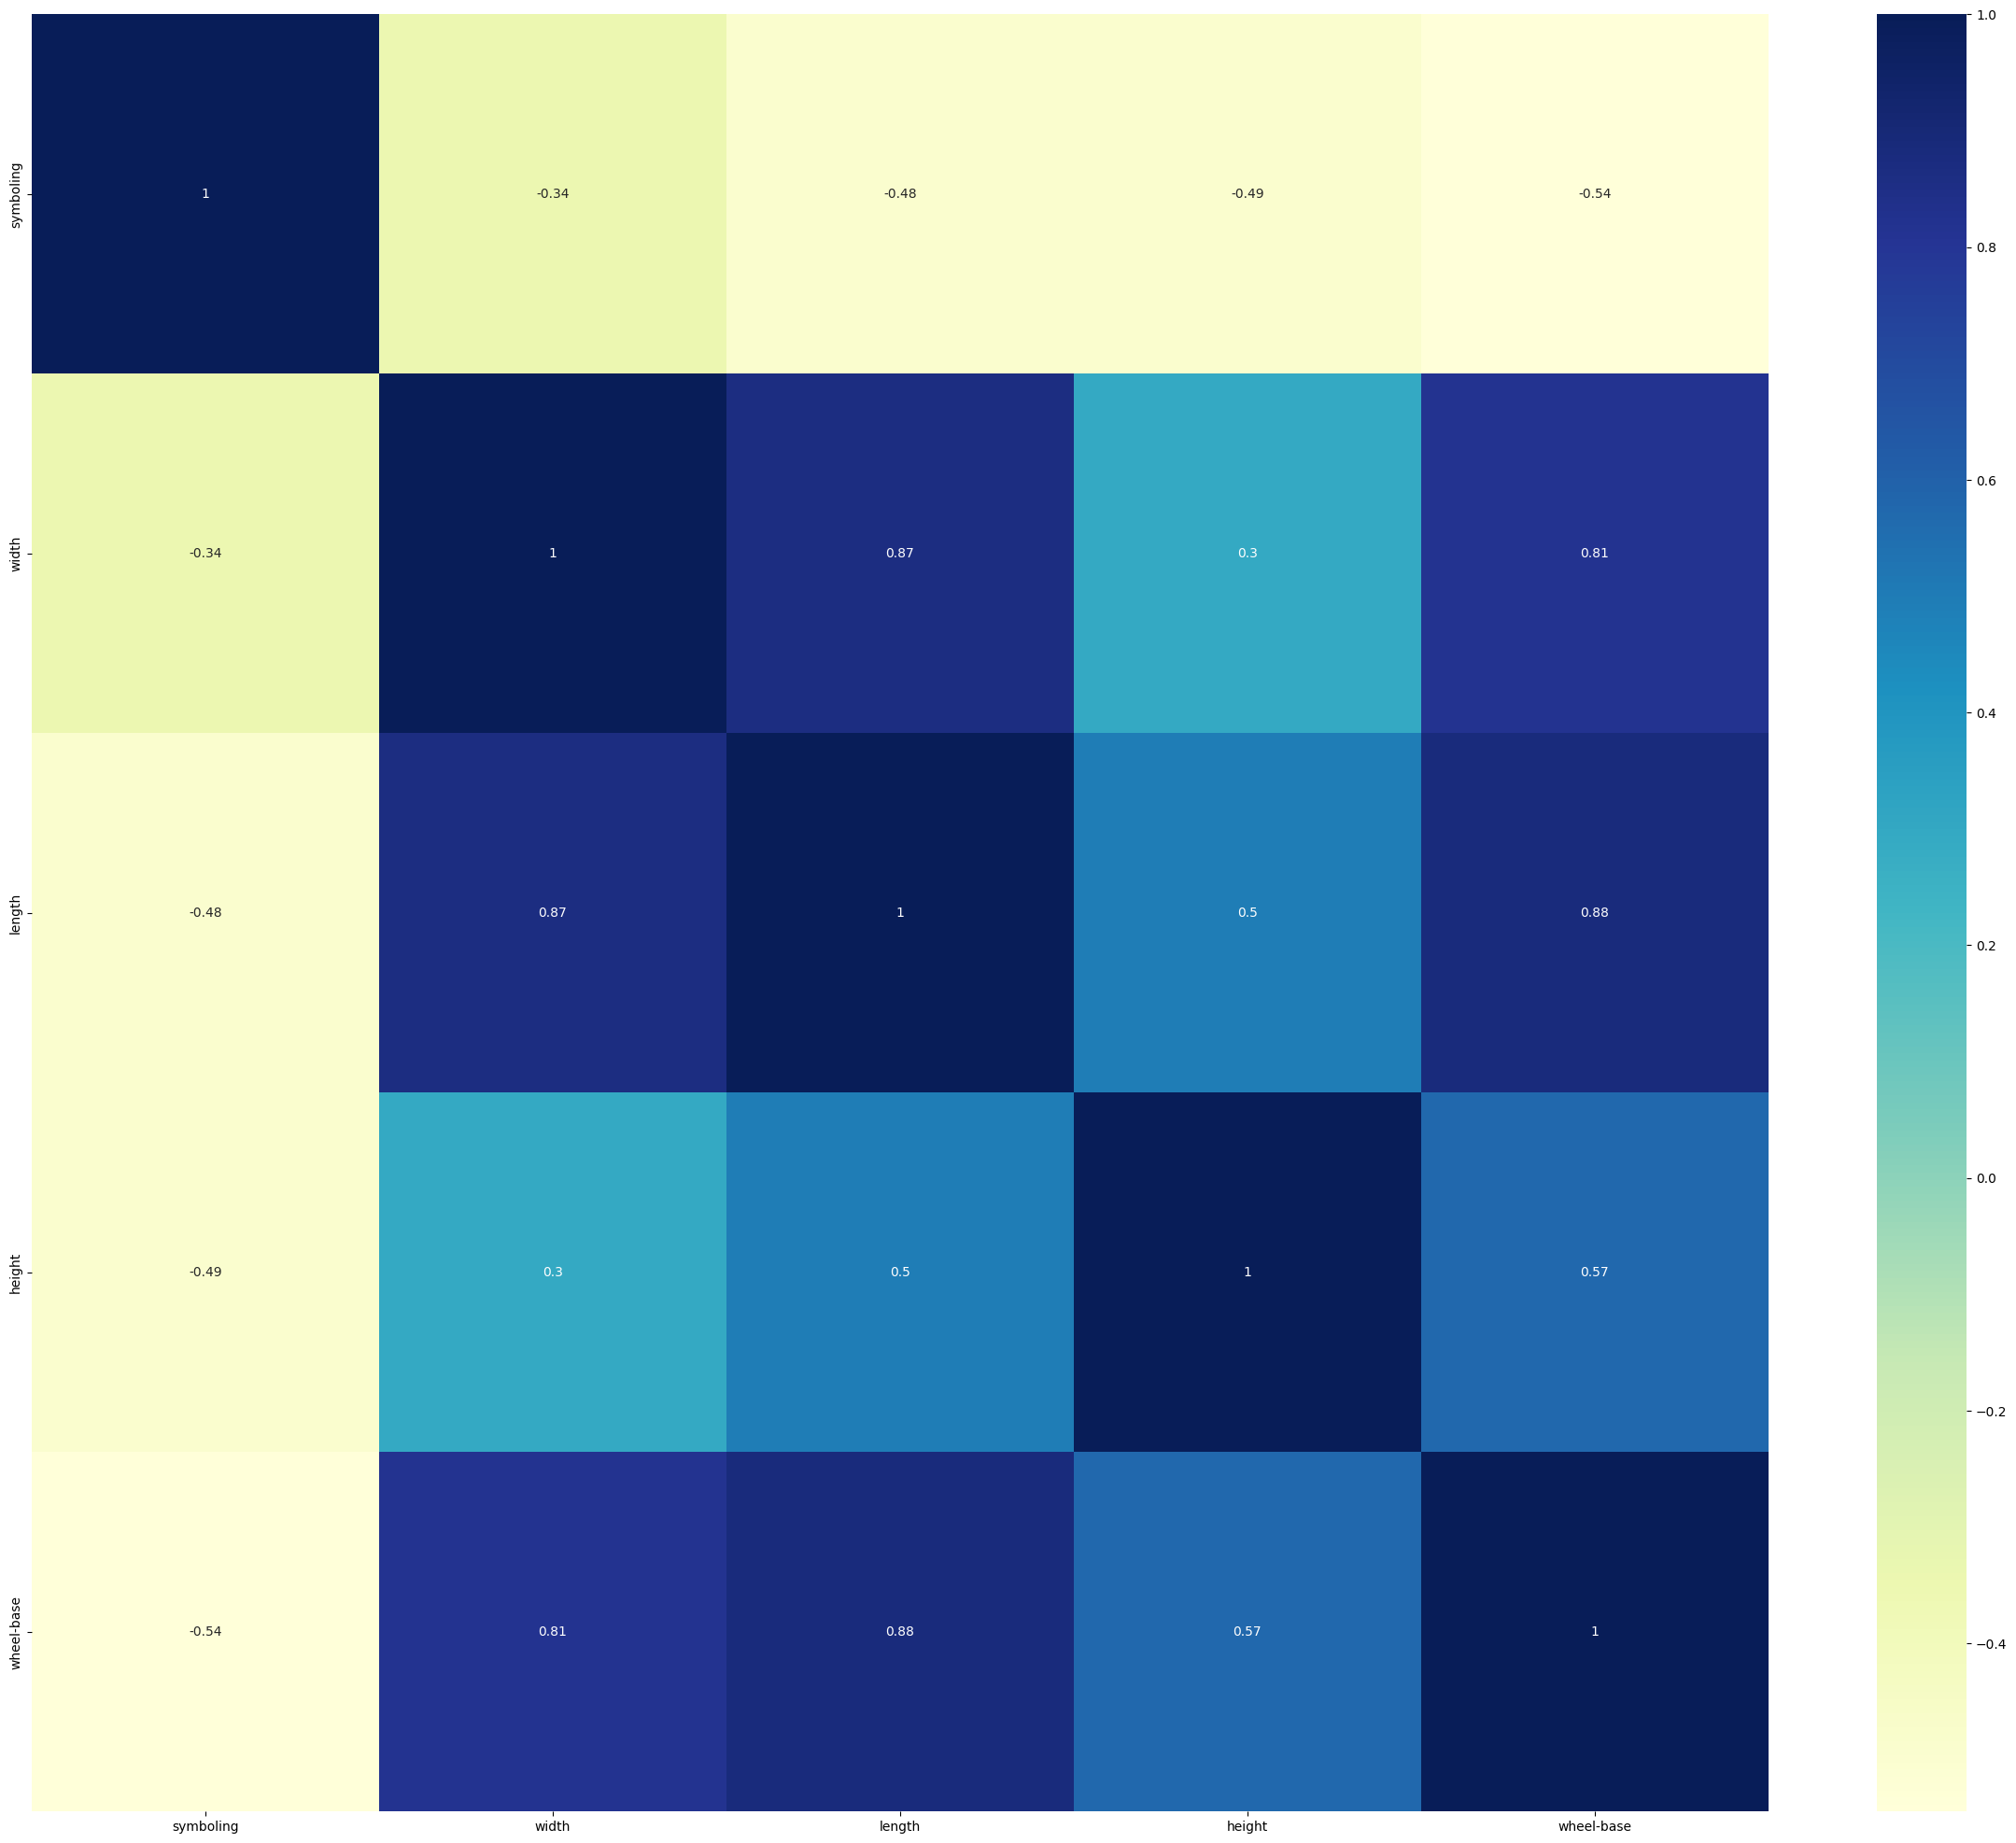

In [ ]:
#Realizamos una gráfica de correlación una vez se han escalado los datos.
plt.figure(figsize = (30,25))
sns.heatmap((df_train.corr()), annot = True, cmap= "YlGnBu")
plt.show()

In [ ]:
df_train.head()

,symboling,width,length,height,wheel-base
174,-1.007435,0.232702,0.050257,0.376700,0.524814
187,0.992620,-0.236175,-0.267396,0.716579,-0.320413
99,-1.007435,-0.376838,-0.128932,0.291730,-0.336986
86,0.992620,-0.283063,-0.210381,-1.025302,-0.486144
73,-1.007435,2.670860,2.697366,1.141428,3.590835


In [ ]:
print(y_train)

91     1
118    1
175    0
37     0
148    0
      ..
115    0
15     0
101    0
191    0
111    0
Name: symboling, Length: 154, dtype: int64


In [ ]:
print(X_train)

     make  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
91     12          1           0             1           3             1   
118    14          1           0             1           2             1   
175    18          1           0             0           2             1   
37      5          1           0             1           2             1   
148    17          1           0             0           4             0   
..    ...        ...         ...           ...         ...           ...   
115    13          1           0             0           3             2   
15      2          1           0             0           3             2   
101    12          1           0             0           3             1   
191    19          1           0             0           3             1   
111    13          1           0             0           3             2   

     engine-location  wheel-base  length  width  ...  engine-size  \
91                

**Here we are going to do the training model**

In [ ]:
# @markdown
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



# Separar características (features) y etiquetas (labels)
X = datos2.drop('symboling', axis=1)  # features
y = datos2['symboling']  # label

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos (escalar características numéricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un objeto de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.8974358974358975


#**KNN**#

The KNN (k-Nearest Neighbors) algorithm is a supervised learning method used for classification and regression tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, recall_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from tabulate import tabulate

In [ ]:
from sklearn.metrics import mean_absolute_error

#*Preparation of the data*#

First, we will extract the independent variables and our target variable, symboling, from the df dataframe we've been working with. Since the KNN algorithm measures distances, we will choose to include only the numerical variables in the set of independent variables.

In [ ]:
dependent = datos2['price']
num = datos2.select_dtypes(include=['int64', 'float64'])

Ahora, normalizaremos nuestras variables independientes.

In [ ]:
# Normalizar las variables numéricas
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled, columns=num.columns)

#Visualizamos
print("Variables numéricas normalizadas:")
print(num_scaled.head())

Variables numéricas normalizadas:
   symboling      make  fuel-type  aspiration  num-of-doors  body-style  \
0   0.915475 -2.043941   0.330447   -0.470658      1.175889   -3.020694   
1   0.915475 -2.043941   0.330447   -0.470658      1.175889   -3.020694   
2   0.915475 -2.043941   0.330447   -0.470658      1.175889   -0.716370   
3   0.915475 -1.874126   0.330447   -0.470658     -0.850420    0.435792   
4   0.915475 -1.874126   0.330447   -0.470658     -0.850420    0.435792   

   drive-wheels  engine-location  wheel-base    length  ...  engine-size  \
0      1.224129        -0.125656   -1.682379 -0.444024  ...     0.045215   
1      1.224129        -0.125656   -1.682379 -0.444024  ...     0.045215   
2      1.224129        -0.125656   -0.720911 -0.251195  ...     0.575559   
3     -0.593232        -0.125656    0.142781  0.182672  ...    -0.461021   
4     -2.410593        -0.125656    0.077596  0.182672  ...     0.189854   

   fuel-system      bore    stroke  compression-ratio  hor

We will build our final dataset for the model.

In [ ]:
# Asignamos valores a las variables
x = num_scaled
y = dependent
y = np.expand_dims(y, axis=1)
data = np.concatenate((x, y), axis = 1)

d_model = pd.DataFrame(data)
labels = list(num_scaled.columns)
labels.append('symboling')
d_model.columns=labels
d_model['symboling'] = d_model['symboling'].astype(int).astype('str')
d_model.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,0,-2.043941,0.330447,-0.470658,1.175889,-3.020694,1.224129,-0.125656,-1.682379,-0.444024,...,0.866576,0.513027,-1.808186,-0.288273,-1.482773,-0.213359,-0.679053,-0.557058,0.026025,13495
1,0,-2.043941,0.330447,-0.470658,1.175889,-3.020694,1.224129,-0.125656,-1.682379,-0.444024,...,0.866576,0.513027,-1.808186,-0.288273,-1.482773,-0.213359,-0.679053,-0.557058,0.398480,16500
2,0,-2.043941,0.330447,-0.470658,1.175889,-0.716370,1.224129,-0.125656,-0.720911,-0.251195,...,0.866576,-2.394827,0.702918,-0.288273,-0.660936,-0.213359,-0.992963,-0.704134,0.398480,16500
3,0,-1.874126,0.330447,-0.470658,-0.850420,0.435792,-0.593232,-0.125656,0.142781,0.182672,...,0.866576,-0.517605,0.480415,-0.036204,-1.658881,0.856208,-0.208189,-0.115832,0.082420,13950
4,0,-1.874126,0.330447,-0.470658,-0.850420,0.435792,-2.410593,-0.125656,0.077596,0.182672,...,0.866576,-0.517605,0.480415,-0.540341,-1.306665,0.856208,-1.149918,-1.292436,0.516227,17450


Now that we have our dataset ready for the model, we will explore which values of k give us the best results. To do this, we will split the dataset into training and test sets, using a proportion of 25% for testing and 75% for training.

In [ ]:
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
warnings.filterwarnings("ignore", message="The least populated class in y has only")

# División en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)

# Lista de valores de k a probar
k_values = [ 3, 5, 7,9]

# Diccionario para almacenar las métricas por valor de k
metrics_by_k = {}

# Iterar sobre diferentes valores de k
for k in k_values:
    # Construir el clasificador KNN
    knn = KNeighborsRegressor(n_neighbors=k)

    # Entrenar el clasificador KNN
    knn.fit(x_train, y_train)

    # Validación cruzada
    cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
    cv_accuracy = cv_scores.mean()

    # Predicción en el conjunto de prueba
    y_pred = knn.predict(x_test)

    # Calcular métricas de evaluación
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred,)
    #recall = recall_score(y_test, y_pred, average=None)

    # Almacenar métricas en el diccionario
    metrics_by_k[k] = {'mae': mae,'r2':r2,'mape':mape}
                       #, 'kappa': kappa, 'confusion_matrix': conf_matrix, 'recall': recall, 'cv_accuracy': cv_accuracy}

# Etiquetas de symboling para la matriz de confusión
#symboling_labels = sorted(list(set(dependent)), key=lambda x: int(x), reverse=True)



# Iterar sobre los resultados


In [ ]:
print(f"Valor de mae = {mae}:")
print(f"Valor de r2 = {r2}:")
print(f"Valor de mape = {mape}:")

Valor de mae = 2039.1292517006802:
Valor de r2 = 0.7349731294557509:
Valor de mape = 0.14747652845711298:


Considering these metrics, we lean more towards a value of k=1, as it has better numbers: better precision (0.9184), better Kappa (0.8322), and better recall (0.9091). Therefore, we will train the model with a value of k=1.

In [ ]:
k = 1
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred = knn.predict(x_test)

# Cálculo del margen mean absolute percent error del modelo
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mape:", mape)


mape: 0.10992840321096402


In [ ]:
datos2.price.mean()

13285.025906735751

In [ ]:
# Aplanar los arrays multidimensionales
y_test_flat = y_test.ravel()
y_pred_flat = y_pred.ravel()

# Crear el DataFrame con los arrays aplanados
results = pd.DataFrame({'Actual (y)': y_test_flat, 'Predicted (Fx)': y_pred_flat})
print(results)

    Actual (y)  Predicted (Fx)
0       6918.0          7898.0
1       6669.0          6189.0
2      11595.0          9980.0
3      15250.0         17450.0
4      16695.0         15580.0
5       6695.0          7395.0
6      16558.0         15998.0
7       8195.0          8495.0
8      18950.0         18420.0
9      14489.0         14869.0
10      6295.0          5572.0
11      9095.0          7895.0
12      6575.0          6692.0
13      8189.0          6989.0
14     17950.0         16900.0
15      6095.0          6795.0
16     10595.0          8845.0
17     12629.0         14869.0
18     13499.0         13499.0
19      9279.0          9959.0
20      7799.0          8249.0
21      7975.0          8495.0
22     20970.0         21105.0
23      7957.0          7689.0
24      5499.0          6649.0
25     34028.0         32528.0
26     15510.0         12170.0
27     16503.0         12764.0
28      9988.0         11248.0
29     18150.0         19045.0
30     12945.0          9279.0
31      

In [ ]:
x = k
y= y_pred_flat

ValueError: x and y must have same first dimension, but have shapes (1,) and (49,)

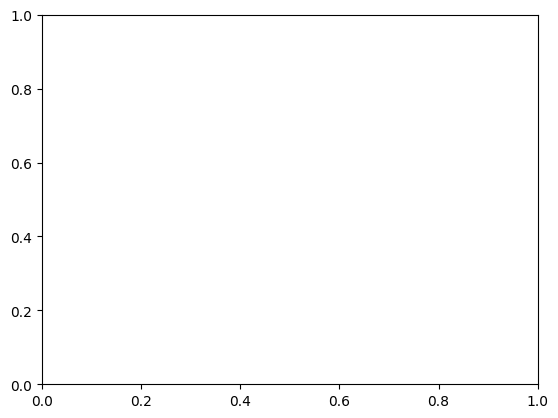

In [ ]:
import matplotlib.pyplot as plt

# Define your data points
x = 1
y = y_pred_flat

# Plot the lines
plt.plot(x, y)

# Add labels and title
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Graph of X vs. Y")

# Show the plot
plt.show()

To evaluate our model, we will implement the **K-fold Cross-Validation** and **LOO** (**Leave-One-Out**) protocols.


---



#### **K-fold Cross-Validation**

This method divides the dataset into equal parts called "**folds**" and performs multiple iterations of fitting and evaluating the model. In each iteration, a different fold is used as the **test set** and the remaining folds are used as the **training set**. At the end, the results of each iteration are averaged to **obtain a more accurate estimate** of the model's performance. It is useful for avoiding overfitting and efficiently using the available data.

We will implement this protocol using libraries from ***sklearn***. The function `cross_val_score(knn, X, y, cv=param)` provides average precision and cross-validation precision values when passing the following parameters:

* The knn classifier.
* The target variable data.
* The independent variable data.
* The number of folds in the validation (`cv`).

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import warnings

# Ignorar la advertencia DataConversionWarning
warnings.filterwarnings("ignore" )

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Realizar la validación cruzada con 5 folds
scores = cross_val_score(knn, x_train, y_train, cv=10)

# Precisión de la validación cruzada
cv_precision = [scores]
mean = scores.mean()


# Crear una lista de diccionarios con los resultados de cada fold
results = [{"Fold": i+1, "Precisión": score} for i, score in enumerate(scores)]

# Imprimir la tabla formateada
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))
print(f"\nPrecisión promedio: {mean}")


NameError: name 'x_train' is not defined

La precisión de la validación cruzada para cada fold varía desde 0.86 hasta 1. Esto indica que la precisión del modelo varía dependiendo de cómo se dividen los datos en cada fold.

La precisión promedio de la validación cruzada es 0.9309, lo que significa que, en promedio, el modelo k-NN con k=1 tiene una precisión del 93.09% en la predicción de las muestras del conjunto de datos.
Dado que has utilizado un valor de k=1, el modelo se basa únicamente en la clase del vecino más cercano para hacer predicciones.

La precisión de la validación cruzada indica cuánto se puede confiar en este enfoque en promedio a través de diferentes divisiones de los datos en folds. En este caso, la precisión promedio sugiere que el modelo puede tener un rendimiento moderado en la clasificación de las muestras.

#### **LOO: Leave-One-Out**

This method is similar to cross-validation but uses a single example as the test set in each iteration, while the rest of the data is used as the training set. This process is repeated for each example in the dataset, ensuring that each data point is used as the test set exactly once.

As with cross-validation, we will use libraries from `sklearn` for the implementation of this protocol. The difference here is that for the `cv` parameter, we use a LOO instance to indicate to the function how to handle the different folds.

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Realizar leave-one-out
loo = LeaveOneOut()
scores = cross_val_score(knn, x_train, y_train, cv=loo)

# Imprimir los resultados de leave-one-out
print("Precisión de leave-one-out:", scores)
print("Precisión promedio:", scores.mean())

NameError: name 'x_train' is not defined

*   **Leave-One-Out Precision:** This is a list of values, where each value represents the model's precision in a specific iteration of the LOO. Each value corresponds to an individual observation left out as the test set. A value of 1 indicates that the model correctly predicted the label of the test observation, while a value of 0 indicates an incorrect prediction.
*   **Average Precision:** This is the average of all the leave-one-out precision values. In this case, the value is approximately 0.9375. It indicates the average precision of the model when evaluated using LOO across the entire dataset.

# **<big><big>THIRD HANDABLE  </big></big><br>**

pre cleaning

In [ ]:
datos3 = datos2.copy()

In [ ]:
datos3.head(5)

In [ ]:
datos3.columns

In [ ]:
import numpy as np

# Lista de columnas para las que queremos encontrar excepciones
columnas = [ 'make', 'fuel-type',  'num-of-doors',
       'body-style', 'drive-wheels',  'wheel-base', 'length',
       'width', 'height', ' curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size',  'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
indicesAQuitar = np.array([], dtype=int)

# Iterar sobre cada columna y obtener los índices de las primeras 6 filas ordenadas descendientemente
for columna in columnas:
    temp = datos3.nlargest(6, columna).index.to_numpy()
    print(f"Excepciones de {columna}: ", np.sort(temp))
    indicesAQuitar = np.union1d(indicesAQuitar, temp)

indicesAQuitar


In [ ]:
dataDepurado = datos3.loc[~datos3.index.isin(indicesAQuitar)]
dataDepurado.shape

In [ ]:
dataStd = pd.DataFrame(preprocessing.scale(dataDepurado.iloc[:,2:]))
dataStd.columns=dataDepurado.columns[2:]

In [ ]:
dataStd.mean(axis=0)

In [ ]:
dataStd.std(axis=0)

# Dimensionality Reduction with PCA

##PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:

df_numPCA = dataStd.select_dtypes(include=['int64', 'float64'])

# Estandarización de datos
scaler = StandardScaler()
data_std = scaler.fit_transform(df_numPCA)

In [ ]:
pca = PCA()
pca.fit(df_numPCA.iloc[:, 0:])

In [ ]:
pca.components_
pca.explained_variance_
components_df = pd.DataFrame(pca.components_, columns=df_numPCA.columns)
print(components_df)

In [ ]:
explained_variance = np.array(pca.explained_variance_)

# Creamos un DataFrame para visualizar los resultados
varianza_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza Explicada': explained_variance
})

print(varianza_df)


This matrix contains the eigenvalues of each principal component. It indicates how much variance of the original data is captured by each component.

\\

The first principal component captures a variance of 8.302 , which means that this component contains the most information in the original dataset.

In [ ]:
var_exp_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con el identificador del componente y la varianza explicada
components_var_exp = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(var_exp_ratio))],
    'Explained Variance Ratio': var_exp_ratio
})

print(components_var_exp)

This matrix shows the proportion of variance explained by each of the principal components. These values are normalized so that the sum of all proportions is equal to 1. This gives you an idea of the relative importance of each principal component in terms of the total variance of the data.

\\

The first principal component explains approximately 35.79% of the total variance of the data. This is the most significant component, as it captures nearly half of all the variability present in the data.

\\

The second principal component explains an additional 15.76% of the total variance. While this is significantly less than the first component, it is still an important contributor.

\\

The third principal component adds an 9.80% of explained variance.

\\

The fourth principal component adds approximately 8%.

\\
The fifth principal component adds approximately 5.4%

\\

The six principal component adds approximately 4.5%

\\

The seven principal component adds approximately 4%

\\

We see that by retaining only **PC1 and PC2 and PC3**, we would capture approximately **61.35%  of the total variance, and if we add** **PC4,PC5,PC6 and PC7** **((8.0%+ 5.4% + 4.5%+ 4.0%))** we would capture at least  **83.25%** of the total variance.

In [ ]:
# Vector de varianza explicada por cada componente principal


# Cálculo de la varianza explicada acumulada
cum_var_exp = np.cumsum(var_exp_ratio)

# Vector de varianza explicada
explained_variance = np.array(pca.explained_variance_)

# Crear identificadores de componentes principales
componentes = [f'PC{i+1}' for i in range(len(var_exp_ratio))]

# Crear DataFrame
df_var_exp = pd.DataFrame({
    'Principal Component': componentes,
    'Varianza Explicada': explained_variance,
    'Explained Variance Ratio': var_exp_ratio,
    'Cumulative Variance Ratio': cum_var_exp
})

# Mostrar los resultados
print(df_var_exp)


Using the transform method of PCA, it is possible to transition from the representation in the original dimensions to the representation in the dimensions of the principal component space found.

In [ ]:
dataPca = pca.transform(data_std)

###Visualization and Understanding of Principal Components

Next we are going to show the amount of information each component provides graphically.

In [ ]:

# Cálculo de la varianza explicada acumulada
cum_var_exp = np.cumsum(var_exp_ratio)

# Crear identificadores de componentes principales
componentes = [f'PC{i+1}' for i in range(len(var_exp_ratio))]

# Crear el gráfico
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp_ratio)), var_exp_ratio, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color='g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='Varianza explicada acumulada')

# Establecer etiquetas personalizadas en el eje x
plt.xticks(range(len(componentes)), componentes, rotation=45)

# Etiquetas de los ejes y el título
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')

# Mostrar la leyenda y el gráfico
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
np.sum(pca.explained_variance_ratio_[0:7])

This also shows the behavior and proportions explained above. We decided to keep the first **7** principal components, thus preserving **83.25%** of the original information.

In [ ]:
dataPca = dataPca[:,0:4]
dataPca[0:5]

Now we will see the points in the new representation system given by the principal components. For this, we will use a function based on the notebooks of the class, taken from https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

In [ ]:
import matplotlib.pyplot as plt

def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:, index1]
    ys = data[:, index2]
    n = loadings.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i, index1], loadings[i, index2], color='r', alpha=0.5)
        if labels is None:
            plt.text(loadings[i, index1] * 1.15, loadings[i, index2] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i, index1] * 1.15, loadings[i, index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(index1 + 1))
    plt.ylabel("PC{}".format(index2 + 1))
    plt.grid()
    plt.show()

# Asumiendo que dataPca es el resultado de PCA.transform() y pca.components_ son las cargas

labls = df_numPCA.columns.to_list()




Let's see how the behavior is with the first two principal components.



In [ ]:
# Generando biplots para las combinaciones de componentes
biplot(dataPca, pca.components_, 0, 1, labls)
biplot(dataPca, pca.components_, 0, 2, labls)
biplot(dataPca, pca.components_, 0, 3, labls)



#### Interpretation from the components graphics  


* PC1 (Principal Component 1):
This component is mainly influenced by the variables "aspiration", "bore", "num-of-doors", and "price".
Variables such as "aspiration" and "bore" are positively aligned with PC1, while "num-of-doors" and "price" have a negative correlation with this component.
PC1 appears to capture variations in price and parts depending on the type of car aspiraton.

* PC2 (Principal Component 2): This component is mainly influenced by "Engine-size" and "length".
"length" has a strong positive correlation with PC2.
PC2 may be related to the size and dimensions of the car.

* PC3 (Principal Component 3): Mainly influenced by "num-of-cylinders" and "height". This component appears to capture variations related to the size and dimensions of the car.

* PC4 (Principal Component 4): influenced by "num-cylinders" and "engine-type". This component may be related to engine efficiency aspects.

# Clustering y characterization

## Clustering

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
dataPca = pd.DataFrame(dataPca)
dataPca = dataPca.iloc[:, 0:4]  # Incluye los primeros 4 componentes

# Renombrar las columnas
dataPca.columns = ['PC1', 'PC2', 'PC3', 'PC4']

# Verificar el DataFrame
print(dataPca.head())

### Selection of the number of clusters  

Before we carry out the clustering, we need to choose the best number of clusters between 3 and 5.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

inertia = []
silhouette_scores = []
calinski_scores = []
K = range(3, 6)  # Probar de 3 a 5 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dataPca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(dataPca, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(dataPca, kmeans.labels_))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.subplot(1, 3, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(K, calinski_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

The chart results are mixed:

* Elbow Method: No clear "elbow" is observed, as inertia continues to decrease linearly. In this case, the elbow method does not provide a definitive conclusion about the best number of clusters.

* Silhouette Score: A higher Silhouette Score indicates better cohesion and separation of clusters. In this graph, 3 clusters have the highest Silhouette Score, suggesting that the clusters are better defined with 3 clusters.

* Calinski-Harabasz Score: A higher Calinski-Harabasz Score indicates better cluster formation. According to this graph, 5 clusters have the best formation.

Since the graphs of these methods do not conclude anything, we are going to compare the dispersions and concentrations of data with 5 and 3 clusters with a density graph.

### 3 clusters

In [ ]:
nc3 = KMeans(n_clusters=3, random_state=0, n_init=10)
nc3.fit(dataPca)
clusters = nc3.labels_

In [ ]:
dataPcaC3 = dataPca
dataPcaC3['Cluster']= clusters
counter=Counter(clusters)

print(counter)

In [ ]:
var_num = labls

In [ ]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:4]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPcaC3.loc[dataPcaC3.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPcaC3.loc[dataPcaC3.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPcaC3.loc[dataPcaC3.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

### 5 clusters

In [ ]:
nc5 = KMeans(n_clusters=5, random_state=0, n_init=10)
nc5.fit(dataPca)
clusters = nc5.labels_

In [ ]:
dataPcaC5 = dataPca
dataPcaC5['Cluster']= clusters
counter=Counter(clusters)

print(counter)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

fig = plt.figure(figsize=(18,15))
i = 1

# Ajustar la paleta de colores para 5 clusters
colorPalette = ["r", "b", "g", "c", "m"]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

for var in dataPca.columns[0:4]:
    ax = fig.add_subplot(math.ceil(len(dataPcaC5.columns[0:4]) / 2), 2, i)
    for j in range(5):
        sns.kdeplot(dataPcaC5.loc[dataPcaC5.Cluster == j][var], shade=True, color=colorPalette[j], ax=ax)
    plt.title(var)
    plt.legend(cluster_labels)
    i += 1

plt.tight_layout()
plt.show()


**3 Clusters** is the most appropriate option for the analysis. It provides better internal cohesion and separation between clusters (which is aligned with Calinski-Harabasz), which facilitates subsequent characterization and analysis. Although 5 clusters offer more detail, the significant overlap between clusters makes clear distinction and characterization difficult, which can lead to less accurate interpretation of the data.

### Performing clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [ ]:
dataPca['Cluster']= clusters
counter=Counter(clusters)

print(counter)

Next we are going to show the scatter plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
colorPalette = ["r", "b", "g"]

# PC1 vs PC2
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
ax.set_title("PC1 vs. PC2")

# PC1 vs PC3
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
ax.set_title("PC1 vs. PC3")

# PC2 vs PC3
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
ax.set_title("PC2 vs. PC3")

# PC2 vs PC4
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="PC2", y="PC4", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
ax.set_title("PC2 vs. PC4")

# Mostrar los gráficos
plt.tight_layout()
plt.show()



###Inferring from graphs

**Graph 1: PC1 vs PC2**



* Cluster 0 (red): This cluster appears to be centered around the origin, but more dispersed along the PC2 axis. This indicates that the observations in this cluster have moderate values of "price" and "aspiration" (influencing PC1), and greater variability in "length" and "Engine-size" (influencing PC2).
* Cluster 1 (blue): It is more concentrated in the central part of the graph, but slightly dispersed along both axes. This suggests that this cluster has observations with medium values, but also has extremes in the influential variables in PC1 and PC2.
* Cluster 2 (green): It disperses further to the right of the graph, suggesting higher values of "aspiration" and "bore" (PC1), and variability in "length" and "Engine-size" (PC2). Cars in this cluster tend to have a higher price and engine size.

**Graph 2: PC1 vs PC3**


* Cluster 0 (red): It is mainly scattered throughout PC1, indicating significant variability in price and bore. These cars have varying values in terms of engine price.
* Cluster 1 (blue): It is more dispersed in the central part of the graph. This suggests that the observations have intermediate values for aspiration and bore (PC1) and variability in num-of-cylinders (PC3).
* Cluster 2 (green): Shows dispersion mainly along PC1, indicating higher values in height and bore, with variability in num-of-cylinders and aspiration. Cars in this cluster tend to have higher car power efficiency.

**Graph 3: PC2 vs PC3**

* Cluster 0 (red): Has significant clustering along both axes, indicating significant variability in height and length (PC2), as well as num-cylinders and height (PC3). The cars in this cluster show variability in both fuel efficiency and car size.
* Cluster 1 (blue): It is grouped centrally, suggesting moderate values and not so much at the extremes for the influential variables in PC2 and PC3.
* Cluster 2 (green): Presents dispersion along the axis of PC1, indicating variability in "length" and "engine-size", with higher values in terms of fuel efficiency (PC2).

**Graph 4: PC2 vs PC4**


* Cluster 0 (red): It is clustered mainly along the PC4 axis, indicating moderate values in "Engine-type" and "num-cylinders". These cars show variability in terms of engine efficiency and fuel consumption.
* Cluster 1 (blue): It is more concentrated centrally, suggesting intermediate values for "Engine-type" and "num-cylinders" (PC4) and less extremes in "Engine size" and "length" (PC2).
* Cluster 2 (green): Shows dispersion across PC4, indicating variability in compression-ratio and city-mpg, with higher values in terms of engine efficiency and fuel consumption.

**General Conclusion of the Clusters**

* Cluster (red): This cluster is very varied, showing dispersion in two of the clusters and in the other two dispersion in almost all the main components, indicating that the observations have significant variability in several characteristics of the car such as engine power, efficiency of fuel and dimensions and also price.

* Cluster (blue): This cluster is more dispersed, suggesting that the observations have dispersed values and more extremes in the variables considered.

* Cluster (green): This cluster tends to have higher values in the physical dimensions of the car (such as "Engine -type" and "length") and significant variability in terms of fuel efficiency.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_original = pd.DataFrame(dataStd)
df_original['Clusters'] = clusters
df_cluster_symboling = df_original[['Clusters', 'width']]

plt.figure(figsize=(10, 6))

sns.countplot(data=df_original, x='Clusters', hue='width', palette='Set2')
plt.title('Distribución de width por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Frecuencia')

plt.legend(title='width', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_original = pd.DataFrame(dataStd)
df_original['Clusters'] = clusters
df_cluster_symboling = df_original[['Clusters', 'height']]

plt.figure(figsize=(10, 6))

sns.countplot(data=df_original, x='Clusters', hue='height', palette='Set2')
plt.title('Distribución de la height por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Frecuencia')

plt.legend(title='height', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [ ]:
# Calcular la media de las variables originales por clúster
df_nume = dataStd.select_dtypes(include=['int64', 'float64'])
df_nume['Clusters'] = clusters
cluster_means = df_nume.groupby('Clusters').mean()
cluster_means = cluster_means.transpose()
cluster_means_styled = cluster_means.style.set_caption('Media de Variables por Clúster').set_table_styles([
    {'selector': 'table', 'props': [('border-radius', '10px')]}
])
cluster_means_styled

In [ ]:
# Calcular la desviación estándar para cada cluster
cluster_std = df_nume.groupby('Clusters').std()

# Transponer para tener las variables como filas
cluster_std = cluster_std.transpose()

# Estilizar la tabla
cluster_std_styled = cluster_std.style.set_caption('Desviación Estándar de Variables por Clúster').set_table_styles([
    {'selector': 'table', 'props': [('border-radius', '10px')]}
])

# Mostrar la tabla
cluster_std_styled


## Characterization

To characterize the car clusters based on the original variables, we will analyze the mean and standard deviation of the numerical variables in each cluster, as well as the distribution of the Height variable and the information analyzed in the principal components plots:


MEAN

In [ ]:
datos3.mean(

)

###STD

In [ ]:
datos3.std()